In [1]:
# installing 1.0.3 because this version of pandas supports write to s3
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# This path will be active after the launch of the hackathon / day-day-up-unsw / s3://tf-trachack-notebooks/day-day-up-unsw/jupyter/jovyan/
teamname = 'day-day-up-unsw' #'trachack-a-groups-admin-py-tracfone'
data_folder='s3://tf-trachack-data/212/'
# change root_folder to your team's root folder
# s3://tf-trachack-notebooks/<this should be replaced by team name as provided in EMAIL>/jupyter/jovyan/
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from pandas import to_datetime

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
# phone_info_eval=pd.read_csv(data_folder+"data/eval/phone_info.csv")
# customer_info_eval=pd.read_csv(data_folder+"data/eval/customer_info.csv")
redemptions_eval=pd.read_csv(data_folder+"data/eval/redemptions.csv")
deactivations_eval=pd.read_csv(data_folder+"data/eval/deactivations.csv")
reactivations_eval=pd.read_csv(data_folder+"data/eval/reactivations.csv")
suspensions_eval=pd.read_csv(data_folder+"data/eval/suspensions.csv")
# network_usage_domestic_eval=pd.read_csv(data_folder+"data/eval/network_usage_domestic.csv")
# lrp_points_eval=pd.read_csv(data_folder+"data/eval/lrp_points.csv")
# lrp_enrollment_eval=pd.read_csv(data_folder+"data/eval/lrp_enrollment.csv")

In [5]:
# upgrade_phone_info_eval = pd.merge(upgrades_eval, phone_info_eval, on = 'line_id', how = 'inner')
# upgrade_customer_info_eval = pd.merge(upgrades_eval, customer_info_eval, on = 'line_id', how = 'inner')
upgrade_redemptions_eval = pd.merge(upgrades_eval, redemptions_eval, on = 'line_id', how = 'inner')
upgrade_deactivations_eval = pd.merge(upgrades_eval, deactivations_eval, on = 'line_id', how = 'inner')
upgrade_reactivations_eval = pd.merge(upgrades_eval, reactivations_eval, on = 'line_id', how = 'inner')
upgrade_suspensions_eval = pd.merge(upgrades_eval, suspensions_eval, on = 'line_id', how = 'left')
# upgrade_network_usage_domestic_eval = pd.merge(upgrades_eval, network_usage_domestic_eval, on = 'line_id', how = 'inner')
# upgrade_lrp_points_eval = pd.merge(upgrades_eval, lrp_points_eval, on = 'line_id', how = 'left')
# upgrade_lrp_enrollment_eval = pd.merge(upgrades_eval, lrp_enrollment_eval, on = 'line_id', how = 'left')

In [6]:
upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")
# phone_info=pd.read_csv(data_folder+"data/dev/phone_info.csv")
# customer_info=pd.read_csv(data_folder+"data/dev/customer_info.csv")
redemptions=pd.read_csv(data_folder+"data/dev/redemptions.csv")
deactivations=pd.read_csv(data_folder+"data/dev/deactivations.csv")
reactivations=pd.read_csv(data_folder+"data/dev/reactivations.csv")
suspensions=pd.read_csv(data_folder+"data/dev/suspensions.csv")
# network_usage_domestic=pd.read_csv(data_folder+"data/dev/network_usage_domestic.csv")
# lrp_points=pd.read_csv(data_folder+"data/dev/lrp_points.csv")
# lrp_enrollment=pd.read_csv(data_folder+"data/dev/lrp_enrollment.csv")

In [7]:
# upgrade_phone_info = pd.merge(upgrades, phone_info, on = 'line_id', how = 'inner')
# upgrade_customer_info = pd.merge(upgrades, customer_info, on = 'line_id', how = 'inner')
upgrade_redemptions = pd.merge(upgrades, redemptions, on = 'line_id', how = 'inner')
upgrade_deactivations = pd.merge(upgrades, deactivations, on = 'line_id', how = 'inner')
upgrade_reactivations = pd.merge(upgrades, reactivations, on = 'line_id', how = 'inner')
upgrade_suspensions = pd.merge(upgrades, suspensions, on = 'line_id', how = 'left')
# upgrade_network_usage_domestic = pd.merge(upgrades, network_usage_domestic, on = 'line_id', how = 'inner')
# upgrade_lrp_points = pd.merge(upgrades, lrp_points, on = 'line_id', how = 'left')
# upgrade_lrp_enrollment = pd.merge(upgrades, lrp_enrollment, on = 'line_id', how = 'left')

In [8]:
upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")
upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
# upgrades.to_csv(data_folder+"code/data/dev/upgrades_new.csv",header=True,index=None)
# upgrades_eval.to_csv(data_folder+"code/data/eval/upgrades_new_eval.csv",header=True,index=None)

In [18]:
upgrade_redemptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641493 entries, 0 to 641492
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   line_id          641493 non-null  object 
 1   date_observed    641493 non-null  object 
 2   upgrade          641493 non-null  object 
 3   channel          641493 non-null  object 
 4   gross_revenue    641493 non-null  float64
 5   redemption_date  641493 non-null  object 
 6   redemption_type  641493 non-null  object 
 7   revenue_type     641493 non-null  object 
dtypes: float64(1), object(7)
memory usage: 44.0+ MB


In [19]:
upgrade_redemptions_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426856 entries, 0 to 426855
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   line_id          426856 non-null  object 
 1   date_observed    426856 non-null  object 
 2   channel          426856 non-null  object 
 3   gross_revenue    426856 non-null  float64
 4   redemption_date  426856 non-null  object 
 5   redemption_type  426856 non-null  object 
 6   revenue_type     426856 non-null  object 
dtypes: float64(1), object(6)
memory usage: 26.1+ MB


In [10]:
upgrade_redemptions_eval[upgrade_redemptions_eval.line_id == '584f0d75-5897-4e56-b475-0b3adf1aeb07']

,line_id,date_observed,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,44.0,2020-06-30,MPPAID,MPPAID
1,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-12-02,MPPAID,MPPAID
2,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2018-08-09,MPPAID,MPPAID
3,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-04-06,MPPAID,MPPAID
4,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-11-02,MPPAID,MPPAID
5,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,44.0,2020-05-01,MPPAID,MPPAID
6,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-03-07,MPPAID,MPPAID
7,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,44.0,2020-12-27,MPPAID,MPPAID
8,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,44.0,2020-01-02,MPPAID,MPPAID
9,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-10-03,MPPAID,MPPAID


In [11]:
upgrades

,line_id,date_observed,upgrade
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes
...,...,...,...
55863,f89b108a-f453-4419-a4dc-5bf8e1cd1f1a,2021-03-11,no
55864,b703f1d4-57ba-48b6-8adf-46d7aba6a406,2021-03-13,no
55865,e3b2212c-906e-4a8f-8307-6b88fc64d7a0,2021-03-11,no
55866,828df9bf-279c-47c3-96c2-92177a50b8fd,2021-03-14,no


In [12]:
upgrade_phone_info.gsma_operating_system.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55863    False
55864    False
55865     True
55866    False
55867    False
Name: gsma_operating_system, Length: 55868, dtype: bool

In [13]:
upgrade_customer_info.head()

,line_id,date_observed,upgrade,carrier,first_activation_date,plan_name,plan_subtype,redemption_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,carrier 1,2018-08-06,NaN,NaN,NaN
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,carrier 1,2019-04-11,NaN,NaN,NaN
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,carrier 1,2020-09-16,NaN,NaN,NaN
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,carrier 1,2021-01-28,plan 1,[NULL],2021-02-26
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,carrier 1,2020-08-31,NaN,NaN,NaN


In [14]:
upgrade_customer_info.plan_name.value_counts()

plan 1    16767
plan 2    13386
plan 3     9502
Other      2212
plan 4      145
Name: plan_name, dtype: int64

In [15]:
phone_info.head(5)

,line_id,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,internal_storage_capacity,lte,lte_advanced,lte_category,manufacturer,os_family,os_name,os_vendor,os_version,sim_size,total_ram,touch_screen,wi_fi,year_released
0,8803884c-38df-4243-a522-891c2117790c,4,0.0,Smartphone,iPhone 7 (A1779),iOS,32/128/256,1.0,1.0,9.0,Apple,iOS,iOS,Apple,10,Nano,2048,1.0,1.0,2016.0
1,75b2d7a7-c4f8-4cf2-af32-ab25b5dffacc,8,1.0,Smartphone,SM-N975U,Android,256,1.0,1.0,20.0,Samsung,Android,Android,Google,9,Nano,8192,1.0,1.0,2019.0
2,7f10447b-7ce6-4297-9011-8273b11354ee,2+4,0.0,Smartphone,iPhone XR (A1984),iOS,64/128/256,1.0,1.0,12.0,Apple,iOS,iOS,Apple,12,Nano,3072,1.0,1.0,2018.0
3,50579bcb-6413-4dfb-865d-f11d3adad1fe,NaN,NaN,Smartphone,SM-G986U1,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c56e177c-0514-493c-bbc2-7e2c9308aa73,NaN,NaN,Smartphone,LG L722DL,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
upgrade_redemptions.head()

,line_id,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-02-23,MPPAID,MPPAID
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-11-19,MPPAID,MPPAID
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-06-22,MPPAID,MPPAID
3,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2019-03-30,MPPAID,MPPAID
4,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-05-23,MPPAID,MPPAID


In [17]:
upgrade_deactivations.head()

,line_id,date_observed,upgrade,deactivation_date,deactivation_reason
0,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-26,PASTDUE
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-12-27,PASTDUE
2,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-26,PASTDUE
3,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2021-01-22,PASTDUE
4,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2020-12-18,PASTDUE


In [18]:
upgrade_reactivations.head()

,line_id,date_observed,upgrade,reactivation_channel,reactivation_date
0,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,WEB,2021-02-26
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,WEB,2020-11-26
2,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,WEB,2020-12-27
3,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,WEB,2021-01-23
4,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,WEB,2020-11-17


In [19]:
upgrade_suspensions.head()

,line_id,date_observed,upgrade,suspension_start_date,suspension_end_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2012-07-31,2012-08-30
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2016-06-18,2016-06-22
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2017-11-03,2017-11-05
3,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-25,2020-11-26
4,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-25,2021-02-26


In [20]:
upgrade_network_usage_domestic.head()

,line_id,date_observed,upgrade,date,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,voice_min_in,voice_min_out
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2020-11-14,0.0,0.0,1,0,0,0,1087.083008,0,0,0,0
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2021-01-04,0.0,0.0,0,0,1,1,41180.222656,0,0,0,0
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2020-12-11,0.0,0.0,0,0,6,6,485711.753906,2,2,2,0
3,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2020-10-18,0.0,0.0,0,0,2,2,808656.222656,0,0,0,0
4,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2021-03-05,0.0,0.0,1,0,9,8,274417.391602,0,0,0,0


In [21]:
upgrade_lrp_points.head()

,line_id,date_observed,upgrade,quantity,status,total_quantity,update_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,NaN,NaN,NaN,NaN
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,NaN,NaN,NaN,NaN
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,NaN,NaN,NaN,NaN
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,NaN,NaN,NaN,NaN
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,NaN,NaN,NaN,NaN


In [22]:
upgrade_lrp_enrollment.head()

,line_id,date_observed,upgrade,lrp_enrolled,lrp_enrollment_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,Y,2016-04-02
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,Y,2020-10-26
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,NaN,NaN
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,NaN,NaN
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,NaN,NaN


In [23]:
len(upgrade_phone_info)

55868

# Data analysis and statistics

## redemptions

In [24]:
len(upgrades)

55868

In [25]:
upgrade_redemptions

,line_id,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-02-23,MPPAID,MPPAID
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-11-19,MPPAID,MPPAID
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-06-22,MPPAID,MPPAID
3,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2019-03-30,MPPAID,MPPAID
4,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-05-23,MPPAID,MPPAID
...,...,...,...,...,...,...,...,...
641488,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,WEB,55.0,2021-01-29,MPPAID,MPPAID
641489,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,IVR,55.0,2020-06-02,MPPAID,MPPAID
641490,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,IVR,45.0,2020-09-03,MPPAID,MPPAID
641491,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,IVR,45.0,2020-10-04,MPPAID,MPPAID


Text(0.5, 1.0, 'redemption_date')

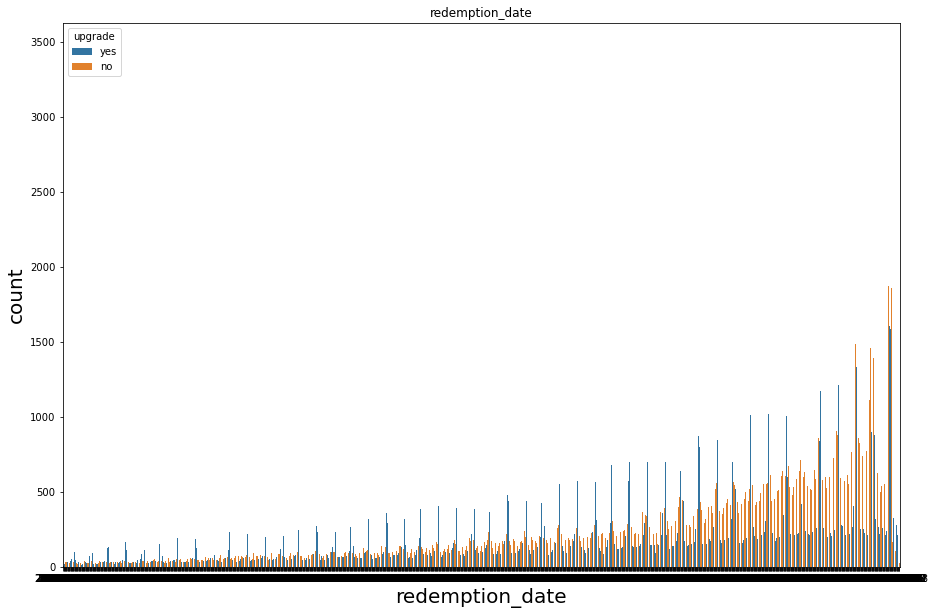

In [11]:
df = upgrade_redemptions.sort_values(by='redemption_date')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_xlabel('redemption_date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='redemption_date')
plt.title('redemption_date')

In [27]:
upgrade_redemptions.revenue_type.value_counts()

MPPAID     637145
REPL         2157
FREE         1408
PAID          695
BP PAID        75
LL BILL        13
Name: revenue_type, dtype: int64

<Figure size 1080x720 with 0 Axes>

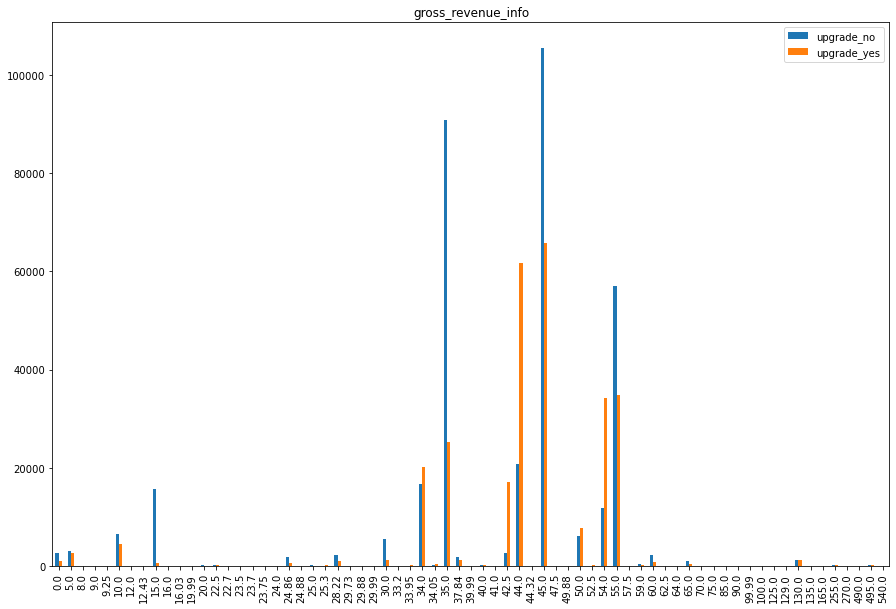

In [28]:
upgrade_redemptions_no = upgrade_redemptions.gross_revenue[upgrade_redemptions.upgrade == 'no'].value_counts()
upgrade_redemptions_yes = upgrade_redemptions.gross_revenue[upgrade_redemptions.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
upgrade_redemptions_info = pd.DataFrame({'upgrade_no': upgrade_redemptions_no, 'upgrade_yes': upgrade_redemptions_yes})
upgrade_redemptions_info.plot(kind='bar', figsize=(15,10))
plt.title('gross_revenue_info')
plt.show()

<Figure size 1080x720 with 0 Axes>

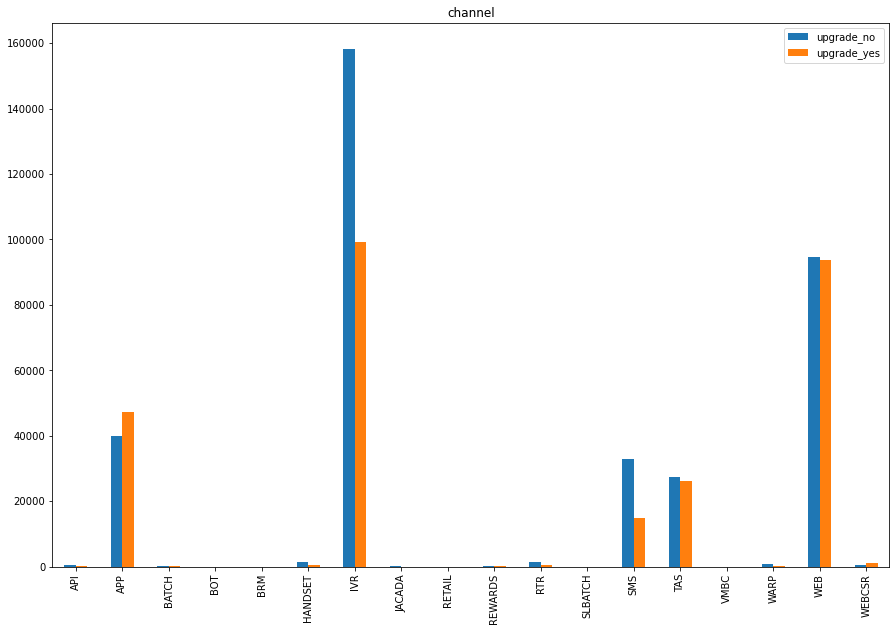

In [29]:
upgrade_redemptions_no = upgrade_redemptions.channel[upgrade_redemptions.upgrade == 'no'].value_counts()
upgrade_redemptions_yes = upgrade_redemptions.channel[upgrade_redemptions.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
upgrade_redemptions_info = pd.DataFrame({'upgrade_no': upgrade_redemptions_no, 'upgrade_yes': upgrade_redemptions_yes})
upgrade_redemptions_info.plot(kind='bar', figsize=(15,10))
plt.title('channel')
plt.show()

<Figure size 1080x720 with 0 Axes>

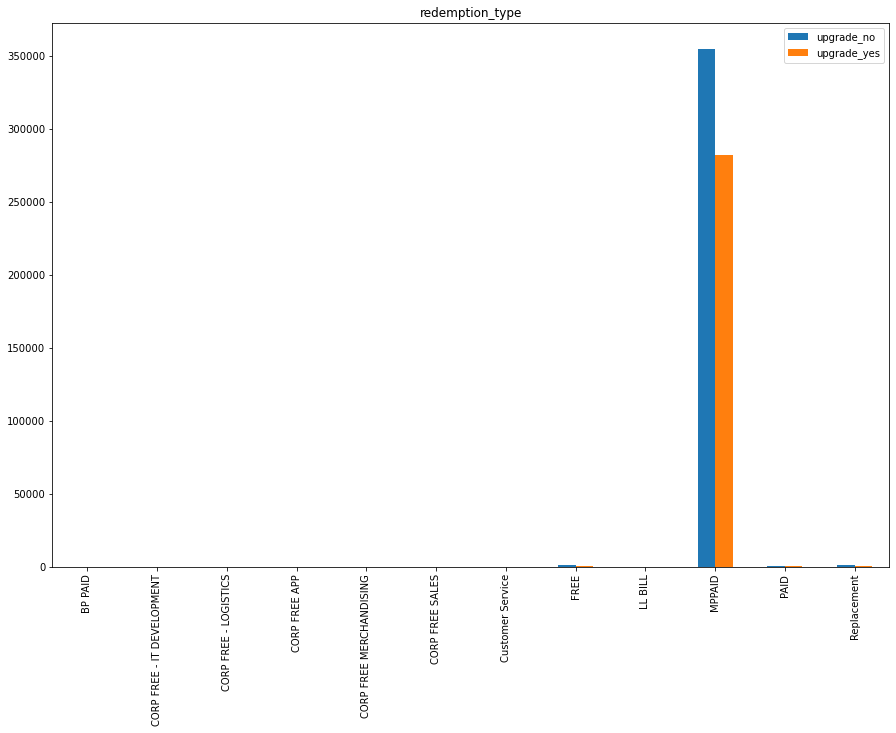

In [30]:
upgrade_redemptions_no = upgrade_redemptions.redemption_type[upgrade_redemptions.upgrade == 'no'].value_counts()
upgrade_redemptions_yes = upgrade_redemptions.redemption_type[upgrade_redemptions.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
upgrade_redemptions_info = pd.DataFrame({'upgrade_no': upgrade_redemptions_no, 'upgrade_yes': upgrade_redemptions_yes})
upgrade_redemptions_info.plot(kind='bar', figsize=(15,10))
plt.title('redemption_type')
plt.show()

<Figure size 1080x720 with 0 Axes>

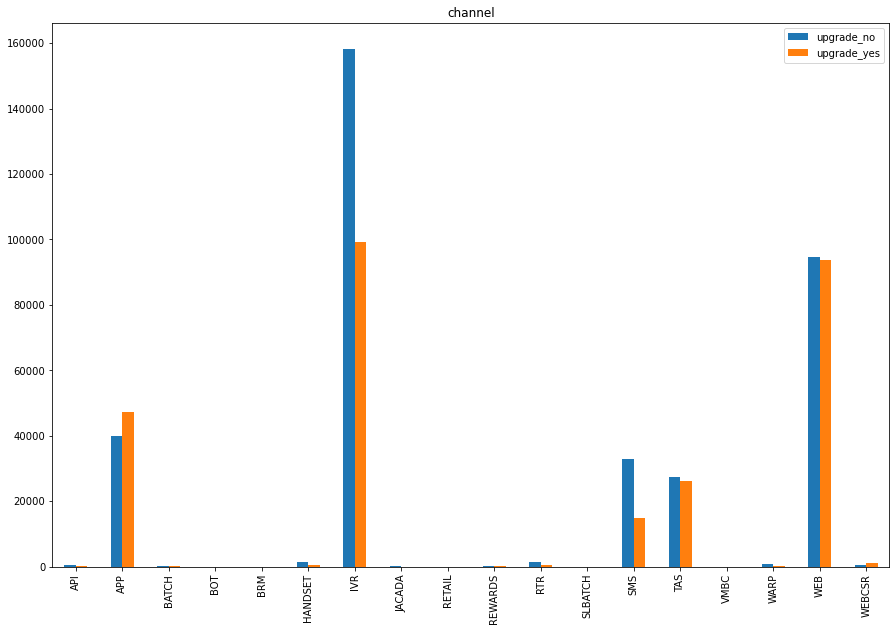

In [20]:
upgrade_redemptions_no = upgrade_redemptions.channel[upgrade_redemptions.upgrade == 'no'].value_counts()
upgrade_redemptions_yes = upgrade_redemptions.channel[upgrade_redemptions.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
upgrade_redemptions_info = pd.DataFrame({'upgrade_no': upgrade_redemptions_no, 'upgrade_yes': upgrade_redemptions_yes})
upgrade_redemptions_info.plot(kind='bar', figsize=(15,10))
plt.title('channel')
plt.show()

In [32]:
len(upgrade_redemptions_eval.redemption_type.value_counts())

10

In [33]:
len(upgrade_redemptions.loc[:,'redemption_type'].value_counts())

12

In [34]:
upgrade_redemptions.groupby(['line_id']).count().reset_index()

,line_id,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,000027f8-7b65-407a-a90e-619e16f7cd60,3,3,3,3,3,3,3
1,0000871b-a418-424b-b6f6-79cfc4db0a12,3,3,3,3,3,3,3
2,00022391-6d4e-41bb-a0ca-2af25cec301d,6,6,6,6,6,6,6
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,3,3,3,3,3,3,3
4,00044afe-35a4-4313-92ec-36618c83fb23,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...
54880,fffc0209-3cec-4a77-be13-2fff03ede88a,2,2,2,2,2,2,2
54881,fffc2f64-85b9-4115-b782-52dbe497fdf6,3,3,3,3,3,3,3
54882,fffee791-298d-4a18-975b-ac3f64938790,43,43,43,43,43,43,43
54883,fffefbba-00b7-42b7-9125-4b86497e0b4f,10,10,10,10,10,10,10


In [35]:
upgrade_redemptions_eval.groupby(['line_id']).count().reset_index()

,line_id,date_observed,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,00006596-10d3-4a05-b11e-112731675bf7,35,35,35,35,35,35
1,00047e17-7213-46d4-98aa-1e766d4674e9,2,2,2,2,2,2
2,0005ee18-7f2e-4867-abce-af569b2fddb4,4,4,4,4,4,4
3,000679de-2c4d-4ffb-bf20-b5822005818d,2,2,2,2,2,2
4,00068567-c0da-4dbe-99f7-93578dd28606,8,8,8,8,8,8
...,...,...,...,...,...,...,...
36509,fff82c89-99a7-4317-a626-093f256e00ed,3,3,3,3,3,3
36510,fffc5111-dbcd-45cb-81cd-31708e6e69ce,23,23,23,23,23,23
36511,fffcdd4b-a0df-4199-8200-fb7ce6c05d08,6,6,6,6,6,6
36512,ffff9e4d-5f70-4528-a583-ca58f6db0ae6,1,1,1,1,1,1


In [36]:
upgrade_redemptions[upgrade_redemptions['upgrade'] == 'yes'].groupby('line_id').count()

,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
line_id,,,,,,,
000b0036-a6b3-490c-a052-d2f2e1b65fa5,39,39,39,39,39,39,39
000ec4fe-543f-4697-a8e6-bb6f560001fc,21,21,21,21,21,21,21
001217a5-414e-409d-847b-4648ab6870bb,45,45,45,45,45,45,45
0017ccd5-e88e-4085-80ad-20d67977c7a7,2,2,2,2,2,2,2
001b701f-223d-40b4-96c7-09f0b7d317da,48,48,48,48,48,48,48
...,...,...,...,...,...,...,...
ffe80103-4a17-46fd-9860-fc58ea3e3b7d,49,49,49,49,49,49,49
fff63e2d-ddcb-49cd-8ded-80e3c592cfab,6,6,6,6,6,6,6
fffee791-298d-4a18-975b-ac3f64938790,43,43,43,43,43,43,43


In [37]:
upgrade_redemptions[upgrade_redemptions['upgrade'] == 'no'].groupby('line_id').count()

,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
line_id,,,,,,,
000027f8-7b65-407a-a90e-619e16f7cd60,3,3,3,3,3,3,3
0000871b-a418-424b-b6f6-79cfc4db0a12,3,3,3,3,3,3,3
00022391-6d4e-41bb-a0ca-2af25cec301d,6,6,6,6,6,6,6
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,3,3,3,3,3,3,3
00044afe-35a4-4313-92ec-36618c83fb23,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...
fff51de7-e63a-4797-aba5-fd8c9d7df07a,3,3,3,3,3,3,3
fff760bb-4be0-456e-bc10-b6f5b8bdc4dd,1,1,1,1,1,1,1
fffa1fc2-fb6a-4284-a6b0-8199cffe383b,16,16,16,16,16,16,16


In [38]:
upgrade_redemptions.groupby(by=['line_id']).count()

,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
line_id,,,,,,,
000027f8-7b65-407a-a90e-619e16f7cd60,3,3,3,3,3,3,3
0000871b-a418-424b-b6f6-79cfc4db0a12,3,3,3,3,3,3,3
00022391-6d4e-41bb-a0ca-2af25cec301d,6,6,6,6,6,6,6
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,3,3,3,3,3,3,3
00044afe-35a4-4313-92ec-36618c83fb23,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...
fffc0209-3cec-4a77-be13-2fff03ede88a,2,2,2,2,2,2,2
fffc2f64-85b9-4115-b782-52dbe497fdf6,3,3,3,3,3,3,3
fffee791-298d-4a18-975b-ac3f64938790,43,43,43,43,43,43,43


In [39]:
upgrade_redemptions.head()

,line_id,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-02-23,MPPAID,MPPAID
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-11-19,MPPAID,MPPAID
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-06-22,MPPAID,MPPAID
3,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2019-03-30,MPPAID,MPPAID
4,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,WEB,44.0,2020-05-23,MPPAID,MPPAID


In [40]:
upgrade_redemptions_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426856 entries, 0 to 426855
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   line_id          426856 non-null  object 
 1   date_observed    426856 non-null  object 
 2   channel          426856 non-null  object 
 3   gross_revenue    426856 non-null  float64
 4   redemption_date  426856 non-null  object 
 5   redemption_type  426856 non-null  object 
 6   revenue_type     426856 non-null  object 
dtypes: float64(1), object(6)
memory usage: 26.1+ MB


In [41]:
upgrade_redemptions_eval.groupby('line_id').count().info()

<class 'pandas.core.frame.DataFrame'>
Index: 36514 entries, 00006596-10d3-4a05-b11e-112731675bf7 to ffffd3ec-fca9-4277-9a99-614d30e3529a
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   date_observed    36514 non-null  int64
 1   channel          36514 non-null  int64
 2   gross_revenue    36514 non-null  int64
 3   redemption_date  36514 non-null  int64
 4   redemption_type  36514 non-null  int64
 5   revenue_type     36514 non-null  int64
dtypes: int64(6)
memory usage: 2.0+ MB


In [42]:
upgrade_redemptions.sort_values(by='redemption_date')[upgrade_redemptions.upgrade == 'yes'].tail(20)

,line_id,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
566360,16be45e9-d05f-43cc-ac80-f0cb82fc26a2,2021-03-14,yes,TAS,45.0,2021-03-13,MPPAID,MPPAID
499576,9cb9dd9d-efe6-4671-bb42-2dd9e87240b2,2021-03-14,yes,WEB,55.0,2021-03-13,MPPAID,MPPAID
396775,ff1c965e-18a7-483b-b566-9956f4fbff05,2021-03-14,yes,IVR,45.0,2021-03-13,MPPAID,MPPAID
436636,d133ab7c-8abf-495c-844e-694b3f666fbe,2021-03-14,yes,IVR,10.0,2021-03-13,MPPAID,MPPAID
231094,dcafdfb5-c4ff-4ac1-804b-be52897c4aa1,2021-03-14,yes,APP,45.0,2021-03-13,MPPAID,MPPAID
129925,e4b3086a-2d5c-441c-bd5c-6323fe31b9ed,2021-03-14,yes,IVR,54.0,2021-03-13,MPPAID,MPPAID
589253,4310d98f-825c-45bd-bbbb-229de857dc92,2021-03-14,yes,IVR,45.0,2021-03-13,MPPAID,MPPAID
180402,a2bc7ecd-6c22-4cfe-88d4-a02c2053ef98,2021-03-14,yes,IVR,45.0,2021-03-13,MPPAID,MPPAID
292727,3ba3024a-4871-40f3-9a58-47f247d6cad2,2021-03-14,yes,IVR,130.0,2021-03-13,MPPAID,MPPAID
286931,b4bbf65e-e6e0-4061-b341-50f69cb060aa,2021-03-14,yes,IVR,44.0,2021-03-13,MPPAID,MPPAID


In [43]:
upgrade_redemptions.sort_values(by='redemption_date')[upgrade_redemptions.upgrade == 'no'].tail(20)

,line_id,date_observed,upgrade,channel,gross_revenue,redemption_date,redemption_type,revenue_type
19437,c7dcdcb7-c55b-45ca-bd72-acaa54a6f308,2021-03-14,no,WEB,55.00,2021-03-13,MPPAID,MPPAID
234968,2f7df116-5a27-4dfd-8603-71012c44b521,2021-03-14,no,IVR,10.00,2021-03-13,MPPAID,MPPAID
394078,4a37613c-7305-490d-a340-9fb5516d6270,2021-03-14,no,SMS,5.00,2021-03-13,MPPAID,MPPAID
474923,97dc8744-5bc1-44f2-8fac-074c32df095a,2021-03-14,no,WEB,10.00,2021-03-13,MPPAID,MPPAID
294663,6ac3be49-101b-4c45-881e-89da0d7060da,2021-03-14,no,IVR,37.84,2021-03-13,MPPAID,MPPAID
233714,cf8c3b6e-26e5-46a8-a841-28af4062c953,2021-03-14,no,WEB,54.00,2021-03-13,MPPAID,MPPAID
294662,4d9c3919-bce5-475f-a27f-7f8ec2c78b70,2021-03-14,no,TAS,10.00,2021-03-13,MPPAID,MPPAID
295336,fe0c2b7e-ee96-4c10-8a74-eae4a5b34ace,2021-03-14,no,WEB,10.00,2021-03-13,MPPAID,MPPAID
19229,a785c573-9913-4616-b534-222e0abededf,2021-03-14,no,WEB,10.00,2021-03-13,MPPAID,MPPAID
105565,8dd5a88b-8903-429c-bc85-ab03fbbd07d7,2021-03-14,no,APP,5.00,2021-03-13,MPPAID,MPPAID


## deactivations

In [44]:
upgrade_deactivations.head(10)

,line_id,date_observed,upgrade,deactivation_date,deactivation_reason
0,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-26,PASTDUE
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-12-27,PASTDUE
2,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-26,PASTDUE
3,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2021-01-22,PASTDUE
4,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2020-12-18,PASTDUE
5,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2021-02-23,PASTDUE
6,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2020-11-16,PASTDUE
7,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,2020-10-26,PASTDUE
8,78aed261-2ea1-4659-89c9-5e437efeeb58,2021-03-10,no,2021-03-06,PASTDUE
9,045c85c4-0795-4554-a6ce-d53aa6d9baca,2021-03-13,no,2020-12-18,PASTDUE


In [45]:
upgrade_deactivations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256754 entries, 0 to 256753
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   line_id              256754 non-null  object
 1   date_observed        256754 non-null  object
 2   upgrade              256754 non-null  object
 3   deactivation_date    256754 non-null  object
 4   deactivation_reason  256754 non-null  object
dtypes: object(5)
memory usage: 11.8+ MB


In [21]:
upgrade_deactivations_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168905 entries, 0 to 168904
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   line_id              168905 non-null  object
 1   date_observed        168905 non-null  object
 2   deactivation_date    168905 non-null  object
 3   deactivation_reason  168905 non-null  object
dtypes: object(4)
memory usage: 6.4+ MB


In [46]:
upgrade_deactivations.groupby(by=['line_id'])['upgrade'].count()

line_id
000027f8-7b65-407a-a90e-619e16f7cd60     3
0000871b-a418-424b-b6f6-79cfc4db0a12     1
00022391-6d4e-41bb-a0ca-2af25cec301d     6
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8     1
00044afe-35a4-4313-92ec-36618c83fb23    12
                                        ..
fff51de7-e63a-4797-aba5-fd8c9d7df07a     1
fffa1fc2-fb6a-4284-a6b0-8199cffe383b     7
fffc0209-3cec-4a77-be13-2fff03ede88a     1
fffc2f64-85b9-4115-b782-52dbe497fdf6     2
fffee791-298d-4a18-975b-ac3f64938790     2
Name: upgrade, Length: 44757, dtype: int64

In [47]:
cross = pd.crosstab(upgrade_deactivations['line_id'], upgrade_deactivations['deactivation_date'])
cross

deactivation_date,2017-03-29,2017-03-30,2017-03-31,2017-04-01,2017-04-02,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,...,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13
line_id,,,,,,,,,,,,,,,,,,,,,
000027f8-7b65-407a-a90e-619e16f7cd60,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0000871b-a418-424b-b6f6-79cfc4db0a12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00022391-6d4e-41bb-a0ca-2af25cec301d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00044afe-35a4-4313-92ec-36618c83fb23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff51de7-e63a-4797-aba5-fd8c9d7df07a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffa1fc2-fb6a-4284-a6b0-8199cffe383b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffc0209-3cec-4a77-be13-2fff03ede88a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# pca = PCA(n_components=0.90)
# data = pca.fit_transform(cross)

In [49]:
# data

In [50]:
upgrade_deactivations[upgrade_deactivations['upgrade'] == 'yes'].groupby('line_id').count()

,date_observed,upgrade,deactivation_date,deactivation_reason
line_id,,,,
000b0036-a6b3-490c-a052-d2f2e1b65fa5,1,1,1,1
000ec4fe-543f-4697-a8e6-bb6f560001fc,10,10,10,10
001217a5-414e-409d-847b-4648ab6870bb,3,3,3,3
001eff97-7611-4873-852b-6ad8cb4cb878,10,10,10,10
0021ab66-6ec2-4c0b-b383-18ebdb0708db,10,10,10,10
...,...,...,...,...
ffd5a1bd-315d-42e0-8db6-821076b5dd1e,1,1,1,1
ffda171f-77c5-4ac2-b4e1-bd2c4a27c51c,7,7,7,7
ffdeb1ca-414a-4cd8-aadf-c1a479725977,3,3,3,3


In [51]:
upgrade_deactivations[upgrade_deactivations['upgrade'] == 'no'].groupby('line_id').count()

,date_observed,upgrade,deactivation_date,deactivation_reason
line_id,,,,
000027f8-7b65-407a-a90e-619e16f7cd60,3,3,3,3
0000871b-a418-424b-b6f6-79cfc4db0a12,1,1,1,1
00022391-6d4e-41bb-a0ca-2af25cec301d,6,6,6,6
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1,1,1,1
00044afe-35a4-4313-92ec-36618c83fb23,12,12,12,12
...,...,...,...,...
ffef7c55-5ce6-44ad-a39b-fc45e3ef1a1e,2,2,2,2
fff51de7-e63a-4797-aba5-fd8c9d7df07a,1,1,1,1
fffa1fc2-fb6a-4284-a6b0-8199cffe383b,7,7,7,7


In [52]:
upgrade_deactivations_eval.groupby(by=['line_id'])['deactivation_date'].count()

line_id
00006596-10d3-4a05-b11e-112731675bf7    30
00047e17-7213-46d4-98aa-1e766d4674e9     1
0005ee18-7f2e-4867-abce-af569b2fddb4     3
00068567-c0da-4dbe-99f7-93578dd28606     8
0008493e-a192-468e-8872-08a2fe139465     7
                                        ..
fff59fcb-e595-447c-932e-c9c8d21b87dd     4
fff649a4-23ec-400c-af1b-4f4c170e46fa     1
fff82c89-99a7-4317-a626-093f256e00ed     1
fffc5111-dbcd-45cb-81cd-31708e6e69ce     3
ffffd3ec-fca9-4277-9a99-614d30e3529a     2
Name: deactivation_date, Length: 29826, dtype: int64

Text(0.5, 1.0, 'deactivation_date')

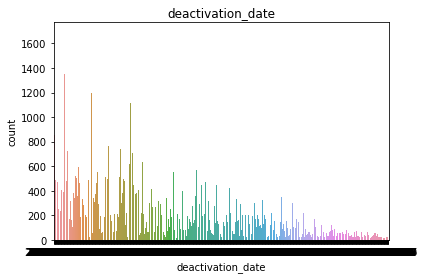

In [23]:
plt.figure()
sns.countplot(data=upgrade_deactivations, x='deactivation_date')
plt.title('deactivation_date')

Text(0.5, 1.0, 'deactivation_reason')

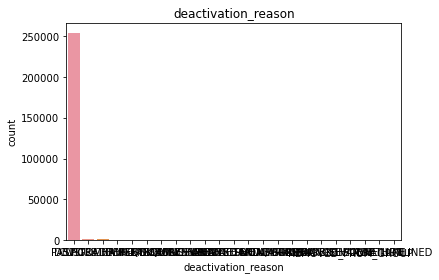

In [54]:
plt.figure()
sns.countplot(data=upgrade_deactivations, x='deactivation_reason')
plt.title('deactivation_reason')

Text(0.5, 1.0, 'deactivation_reason')

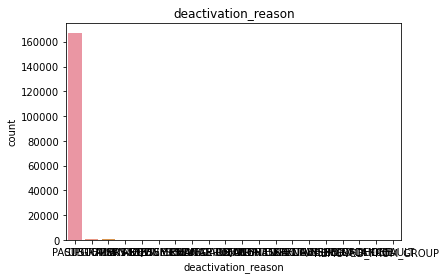

In [55]:
plt.figure()
sns.countplot(data=upgrade_deactivations_eval, x='deactivation_reason')
plt.title('deactivation_reason')

In [56]:
set(upgrade_deactivations.deactivation_reason)

{'ACTIVE UPGRADE',
 'AVFAILURE',
 'CHANGE OF ADDRESS',
 'CUSTOMER REQD',
 'DEFECTIVE',
 'DEVICE CHANGE INQUIRY',
 'DEVICERETURN',
 'LINE HOTLINED',
 'MINCHANGE',
 'NO NEED OF PHONE',
 'PASTDUE',
 'PORT CANCEL',
 'PORT OUT',
 'PORTED NO A/I',
 'REFURBISHED',
 'REMOVED_FROM_GROUP',
 'RISK ASSESSMENT',
 'SENDCARRDEACT',
 'SIM EXCHANGE',
 'STOLEN',
 'STOLEN CREDIT CARD',
 'UPGRADE',
 'WN-SYSTEM ISSUED'}

In [57]:
set(upgrade_deactivations_eval.deactivation_reason)

{'ACTIVE UPGRADE',
 'CHANGE OF ADDRESS',
 'CUSTOMER REQD',
 'DEFAULT',
 'DEFECTIVE',
 'DEVICE CHANGE INQUIRY',
 'MINCHANGE',
 'NO NEED OF PHONE',
 'PASTDUE',
 'PORT CANCEL',
 'PORT OUT',
 'PORTED NO A/I',
 'REFURBISHED',
 'REMOVED_FROM_GROUP',
 'RISK ASSESSMENT',
 'SENDCARRDEACT',
 'STOLEN',
 'STOLEN CREDIT CARD',
 'UPGRADE',
 'WN-SYSTEM ISSUED'}

In [58]:
upgrade_deactivations.groupby("line_id")["line_id", "upgrade", "deactivation_reason"].count()

,line_id,upgrade,deactivation_reason
line_id,,,
000027f8-7b65-407a-a90e-619e16f7cd60,3,3,3
0000871b-a418-424b-b6f6-79cfc4db0a12,1,1,1
00022391-6d4e-41bb-a0ca-2af25cec301d,6,6,6
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1,1,1
00044afe-35a4-4313-92ec-36618c83fb23,12,12,12
...,...,...,...
fff51de7-e63a-4797-aba5-fd8c9d7df07a,1,1,1
fffa1fc2-fb6a-4284-a6b0-8199cffe383b,7,7,7
fffc0209-3cec-4a77-be13-2fff03ede88a,1,1,1


In [59]:
upgrade_deactivations[upgrade_deactivations.line_id == 'dd3a01a3-7baf-4605-9799-ce434328a20d'].sort_values(by='deactivation_date')

,line_id,date_observed,upgrade,deactivation_date,deactivation_reason
6,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2020-11-16,PASTDUE
4,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2020-12-18,PASTDUE
3,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2021-01-22,PASTDUE
5,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2021-02-23,PASTDUE


In [60]:
upgrade_deactivations.sort_values(by='deactivation_date')[upgrade_deactivations.upgrade == 'yes'].tail(20)

,line_id,date_observed,upgrade,deactivation_date,deactivation_reason
169261,2c813485-c1e3-492d-b5d0-94d9e1e56819,2021-03-13,yes,2021-03-12,PASTDUE
174170,1b4806db-60de-4b0c-8fb5-07e753f91d34,2021-03-13,yes,2021-03-12,PASTDUE
152833,42e51e91-150b-4012-9d67-fdf1e04da2a2,2021-03-13,yes,2021-03-12,PASTDUE
127932,2e61ea2c-2483-4de8-bc9a-4abb956fd430,2021-03-14,yes,2021-03-13,PASTDUE
168202,f39a7937-f4af-4f40-af1f-af6c276a454f,2021-03-14,yes,2021-03-13,PASTDUE
238610,cb7b14d7-9433-4460-b440-20a12dcd978e,2021-03-14,yes,2021-03-13,PASTDUE
191920,a1d70761-e8c4-49f1-9c92-31374b92e9d4,2021-03-14,yes,2021-03-13,PASTDUE
186101,5a216340-bfa3-4b40-ae16-9f7bf32258cd,2021-03-14,yes,2021-03-13,PASTDUE
227716,5b3a5299-3eab-4f1e-9226-6423e5478a75,2021-03-14,yes,2021-03-13,PASTDUE
209985,5ba2a6d8-571f-412c-9d2a-82e79ee80f75,2021-03-14,yes,2021-03-13,UPGRADE


In [61]:
upgrade_deactivations.sort_values(by='deactivation_date')[upgrade_deactivations.upgrade == 'no'].tail(20)

,line_id,date_observed,upgrade,deactivation_date,deactivation_reason
143998,1434d818-1770-4327-902e-56259fb9baef,2021-03-14,no,2021-03-13,PASTDUE
159390,5fa7b4d0-452b-4c0a-9a49-df3dc1c6a1b5,2021-03-14,no,2021-03-13,PASTDUE
117733,4d9c3919-bce5-475f-a27f-7f8ec2c78b70,2021-03-14,no,2021-03-13,PASTDUE
117734,6ac3be49-101b-4c45-881e-89da0d7060da,2021-03-14,no,2021-03-13,CHANGE OF ADDRESS
101654,a9471f88-08a8-481e-8cde-65a647ff4127,2021-03-14,no,2021-03-13,PASTDUE
90176,884b95e2-82ae-40f9-8cec-88c59acf664a,2021-03-14,no,2021-03-13,PASTDUE
37082,5b3d0e0b-ac2e-462d-97ee-930837692a69,2021-03-14,no,2021-03-13,CUSTOMER REQD
18271,7a26482c-1cbc-4505-8f34-deef4ab23115,2021-03-14,no,2021-03-13,PASTDUE
11787,9b906b8c-becf-4cf7-9dfb-2f5909a2bfa6,2021-03-14,no,2021-03-13,PASTDUE
234540,d7b4b75d-6ccc-4633-bb40-f83f86427f3b,2021-03-14,no,2021-03-13,PASTDUE


Text(0.5, 1.0, 'deactivation_date')

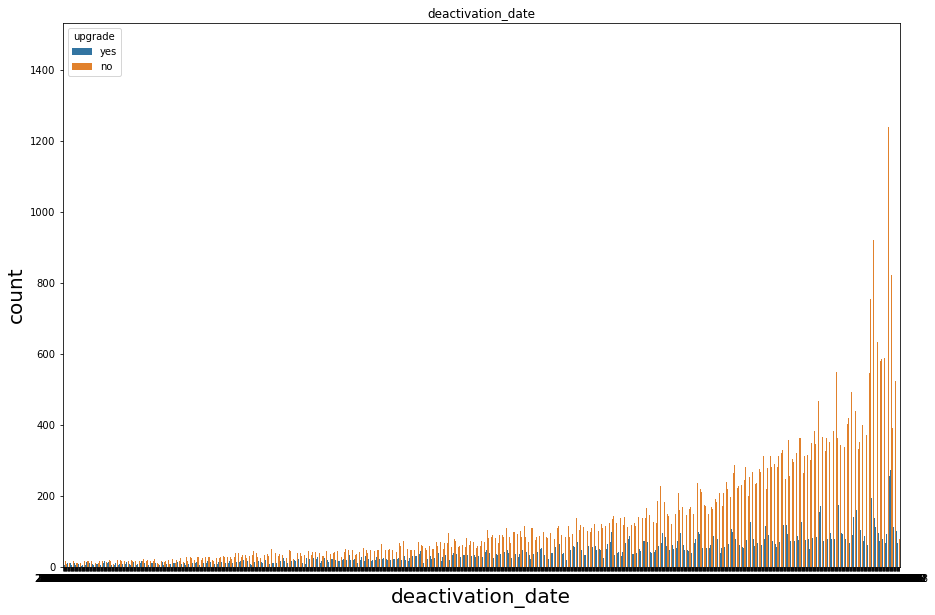

In [12]:
df = upgrade_deactivations.sort_values(by='deactivation_date')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='deactivation_date')
plt.title('deactivation_date')

<Figure size 1080x720 with 0 Axes>

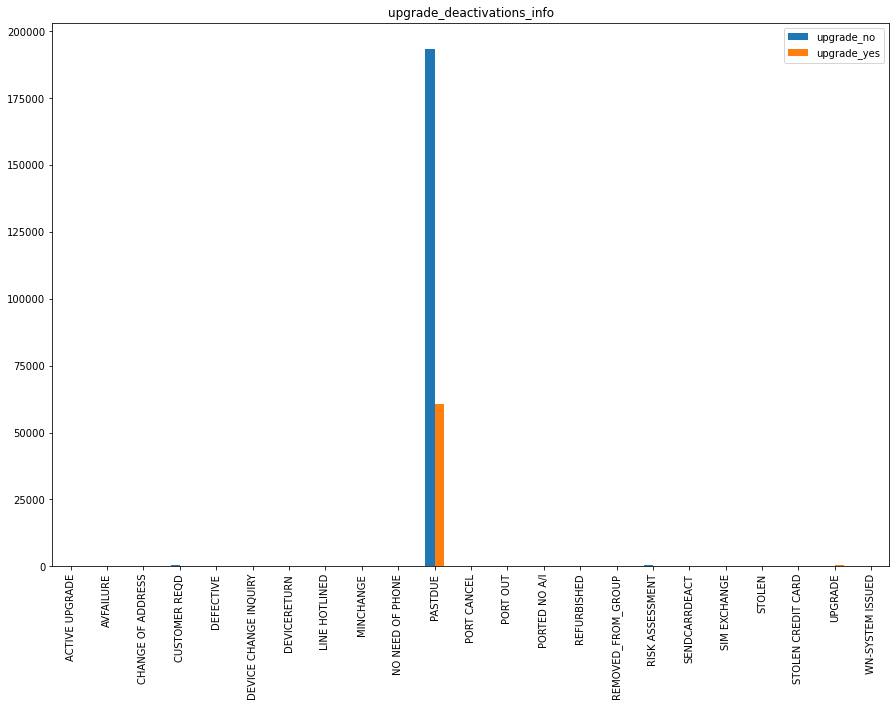

In [63]:
upgrade_deactivations_no = upgrade_deactivations.deactivation_reason[upgrade_deactivations.upgrade == 'no'].value_counts()
upgrade_deactivations_yes = upgrade_deactivations.deactivation_reason[upgrade_deactivations.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
upgrade_deactivations_info = pd.DataFrame({'upgrade_no': upgrade_deactivations_no, 'upgrade_yes': upgrade_deactivations_yes})
upgrade_deactivations_info.plot(kind='bar', figsize=(15,10))
plt.title('upgrade_deactivations_info')
plt.show()

In [64]:
upgrade_deactivations.sort_values(by='deactivation_reason')[upgrade_deactivations.upgrade == 'no']['deactivation_reason'].value_counts()

PASTDUE               193509
CUSTOMER REQD            541
RISK ASSESSMENT          415
PORT OUT                 188
UPGRADE                  115
STOLEN CREDIT CARD        68
STOLEN                    52
SENDCARRDEACT             46
MINCHANGE                 39
CHANGE OF ADDRESS         38
ACTIVE UPGRADE            10
REFURBISHED                8
WN-SYSTEM ISSUED           7
PORT CANCEL                7
PORTED NO A/I              7
DEFECTIVE                  4
NO NEED OF PHONE           3
LINE HOTLINED              2
REMOVED_FROM_GROUP         1
DEVICERETURN               1
AVFAILURE                  1
SIM EXCHANGE               1
Name: deactivation_reason, dtype: int64

In [65]:
upgrade_deactivations.sort_values(by='deactivation_reason')[upgrade_deactivations.upgrade == 'yes']['deactivation_reason'].value_counts()

PASTDUE                  60723
UPGRADE                    558
CUSTOMER REQD              129
DEVICE CHANGE INQUIRY       95
RISK ASSESSMENT             57
PORT OUT                    46
MINCHANGE                   22
STOLEN                      21
STOLEN CREDIT CARD          13
SENDCARRDEACT               10
PORTED NO A/I                6
CHANGE OF ADDRESS            3
ACTIVE UPGRADE               3
WN-SYSTEM ISSUED             2
REMOVED_FROM_GROUP           2
NO NEED OF PHONE             1
Name: deactivation_reason, dtype: int64

In [66]:
upgrade_deactivations.sort_values(by='deactivation_date')[upgrade_deactivations.upgrade == 'yes']['deactivation_date'].value_counts()

2021-02-25    285
2021-02-26    274
2021-02-24    257
2021-02-27    253
2021-01-26    222
             ... 
2017-04-28      2
2017-09-21      2
2017-04-26      2
2017-04-30      2
2017-03-31      1
Name: deactivation_date, Length: 1445, dtype: int64

### reactivation

In [24]:
upgrade_reactivations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248597 entries, 0 to 248596
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   line_id               248597 non-null  object
 1   date_observed         248597 non-null  object
 2   upgrade               248597 non-null  object
 3   reactivation_channel  248597 non-null  object
 4   reactivation_date     248597 non-null  object
dtypes: object(5)
memory usage: 11.4+ MB


In [25]:
upgrade_reactivations_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163333 entries, 0 to 163332
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   line_id               163333 non-null  object
 1   date_observed         163333 non-null  object
 2   reactivation_channel  163333 non-null  object
 3   reactivation_date     163333 non-null  object
dtypes: object(4)
memory usage: 6.2+ MB


Text(0.5, 1.0, 'reactivation_date')

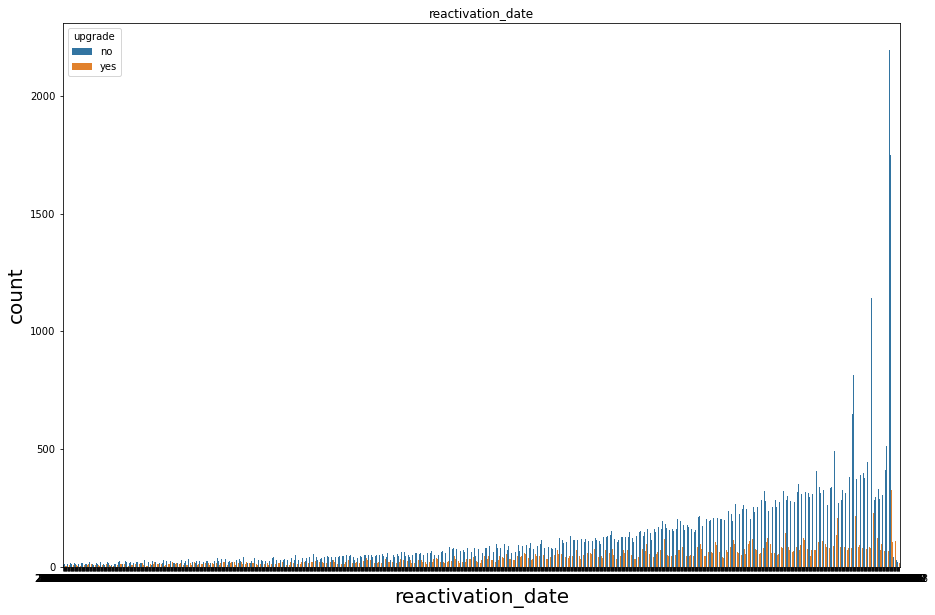

In [13]:
df = upgrade_reactivations.sort_values(by='reactivation_date')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='reactivation_date')
plt.title('reactivation_date')

<Figure size 1080x720 with 0 Axes>

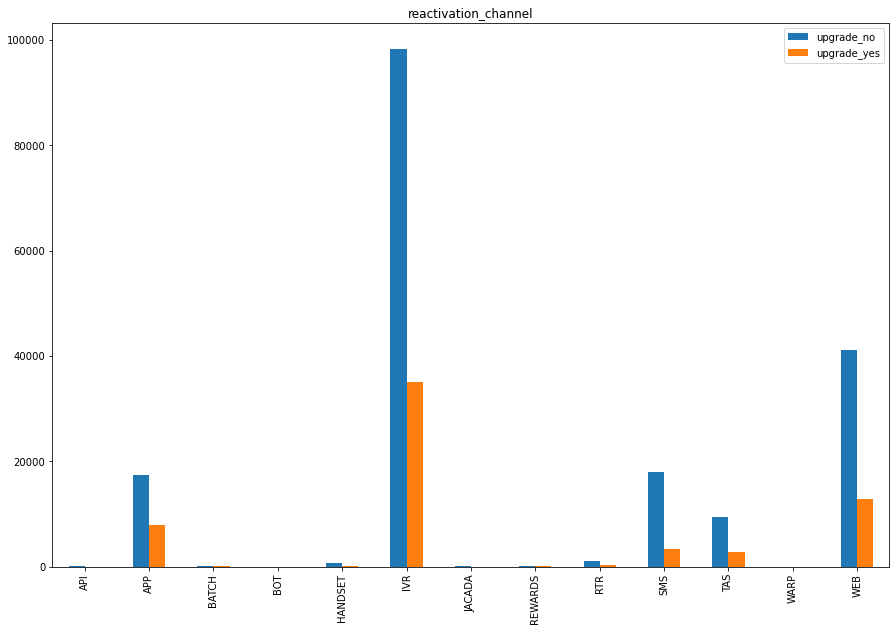

In [68]:
upgrade_reactivations_no = upgrade_reactivations.reactivation_channel[upgrade_reactivations.upgrade == 'no'].value_counts()
upgrade_reactivations_yes = upgrade_reactivations.reactivation_channel[upgrade_reactivations.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
upgrade_reactivations_info = pd.DataFrame({'upgrade_no': upgrade_reactivations_no, 'upgrade_yes': upgrade_reactivations_yes})
upgrade_reactivations_info.plot(kind='bar', figsize=(15,10))
plt.title('reactivation_channel')
plt.show()

### suspension

In [69]:
upgrade_suspensions.head()

,line_id,date_observed,upgrade,suspension_start_date,suspension_end_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2012-07-31,2012-08-30
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2016-06-18,2016-06-22
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2017-11-03,2017-11-05
3,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-25,2020-11-26
4,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-25,2021-02-26


In [ ]:
upgrade_suspensions.info()

In [ ]:
upgrade_suspensions_eval.info()

Text(0.5, 1.0, 'suspension_start_date')

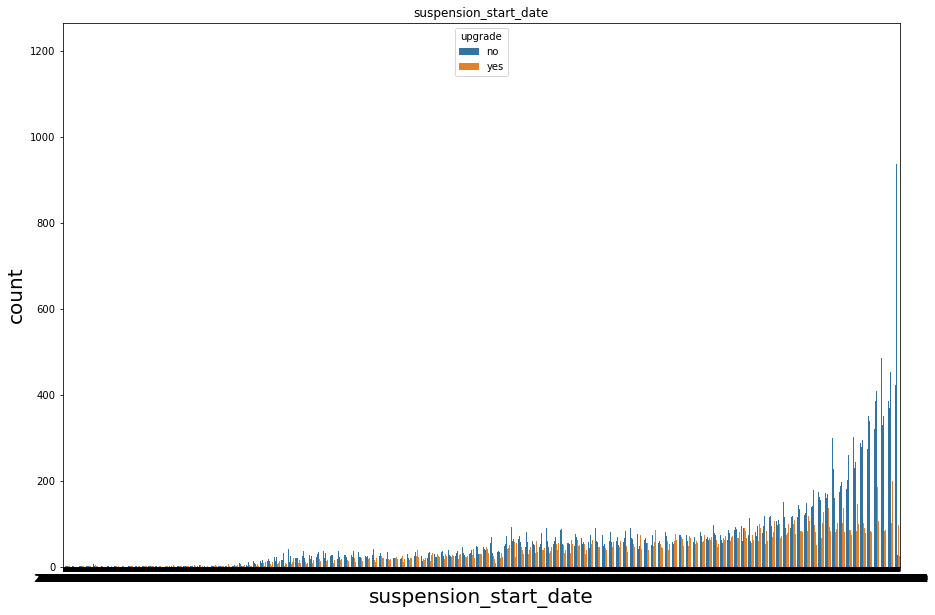

In [14]:
df = upgrade_suspensions.sort_values(by='suspension_start_date')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='suspension_start_date')
plt.title('suspension_start_date')

Text(0.5, 1.0, 'suspension_end_date')

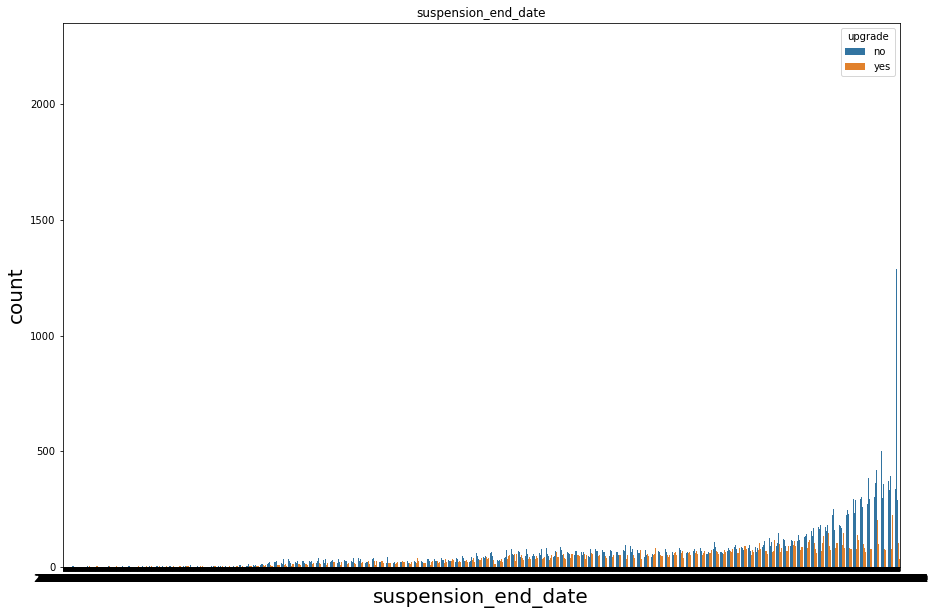

In [15]:
df = upgrade_suspensions.sort_values(by='suspension_end_date')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='suspension_end_date')
plt.title('suspension_end_date')

In [16]:
# upgrade_phone_info['release_date'] = pd.to_datetime(upgrade_phone_info['release_date'], format='%m/%d/%Y')
# upgrade_phone_info['release_date'].value_counts()

In [73]:
# df = upgrade_phone_info.groupby(['release_date'])['upgrade'].count().reset_index(drop=False).sort_values(by = 'release_date')
# df.plot.hist(stacked=True, bins=50)

In [74]:
# upgrade_redemptions['gross_revenue'].hist(bins=100)

# Data Filling and Processing
### upgrade_redemptions

In [ ]:
# def upgrade_phone_info_update():
 
#     for field in fields:
#         print(field)
#         upgrade_phone_info.loc[upgrade_phone_info[field].isnull(), field] = 'N'
#         upgrade_phone_info_eval.loc[upgrade_phone_info_eval[field].isnull(), field] = 'N'

# upgrade redemptions
# date_observed has only five kind of dates
# upgrade_redemptions.loc[upgrade_redemptions['date_observed'] == '2021-03-10', 'date_observed'] = 1
# upgrade_redemptions.loc[upgrade_redemptions['date_observed'] == '2021-03-11', 'date_observed'] = 2
# upgrade_redemptions.loc[upgrade_redemptions['date_observed'] == '2021-03-12', 'date_observed'] = 3
# upgrade_redemptions.loc[upgrade_redemptions['date_observed'] == '2021-03-13', 'date_observed'] = 4
# upgrade_redemptions.loc[upgrade_redemptions['date_observed'] == '2021-03-14', 'date_observed'] = 5

# upgrade_redemptions_eval.loc[upgrade_redemptions_eval['date_observed'] == '2021-03-10', 'date_observed'] = 1
# upgrade_redemptions_eval.loc[upgrade_redemptions_eval['date_observed'] == '2021-03-11', 'date_observed'] = 2
# upgrade_redemptions_eval.loc[upgrade_redemptions_eval['date_observed'] == '2021-03-12', 'date_observed'] = 3
# upgrade_redemptions_eval.loc[upgrade_redemptions_eval['date_observed'] == '2021-03-13', 'date_observed'] = 4
# upgrade_redemptions_eval.loc[upgrade_redemptions_eval['date_observed'] == '2021-03-14', 'date_observed'] = 5

# redemption_date - Do standardization processing for month, year and day respectively
upgrade_redemptions.loc[:,'redemption_year'] = upgrade_redemptions['redemption_date'].apply(lambda x:x.split('-')[0])
upgrade_redemptions.loc[:,'redemption_month'] = upgrade_redemptions['redemption_date'].apply(lambda x:x.split('-')[1])
upgrade_redemptions.loc[:,'redemption_day'] = upgrade_redemptions['redemption_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_redemptions.loc[:,['redemption_year', 'redemption_month', 'redemption_day']])
upgrade_redemptions.loc[:,'redemption_year'] = data[:, 0]
upgrade_redemptions.loc[:,'redemption_month'] = data[:, 1]
upgrade_redemptions.loc[:,'redemption_day'] = data[:, 2]

upgrade_redemptions_eval.loc[:,'redemption_year'] = upgrade_redemptions_eval['redemption_date'].apply(lambda x:x.split('-')[0])
upgrade_redemptions_eval.loc[:,'redemption_month'] = upgrade_redemptions_eval['redemption_date'].apply(lambda x:x.split('-')[1])
upgrade_redemptions_eval.loc[:,'redemption_day'] = upgrade_redemptions_eval['redemption_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_redemptions_eval.loc[:,['redemption_year', 'redemption_month', 'redemption_day']])
upgrade_redemptions_eval.loc[:,'redemption_year'] = data[:, 0]
upgrade_redemptions_eval.loc[:,'redemption_month'] = data[:, 1]
upgrade_redemptions_eval.loc[:,'redemption_day'] = data[:, 2]

# channel, redemption_type, revenue_type
oh = OneHotEncoder(sparse = False)
contents = oh.fit_transform(upgrade_redemptions.loc[:, ['revenue_type']])

n_samples = contents.shape[1]
redemptions_field = []
for i in range(n_samples):
    s = 'redemptions_' + str(i)
    redemptions_field.append(s)
    
for i in range(n_samples):
    upgrade_redemptions[redemptions_field[i]] = contents[:, i]

#Eavlation data set
oh = OneHotEncoder(sparse = False)
contents = oh.fit_transform(upgrade_redemptions_eval.loc[:, ['revenue_type']])

n_samples = contents.shape[1]
redemptions_field = []
for i in range(n_samples):
    s = 'redemptions_' + str(i)
    redemptions_field.append(s)
    
for i in range(n_samples):
    upgrade_redemptions_eval[redemptions_field[i]] = contents[:, i]

# gross_revenue, add column ave_gross_revenue
upgrade_redemptions['ave_gross_revenue'] = upgrade_redemptions.groupby('line_id')['gross_revenue'].transform('mean')
st=StandardScaler() # normalize
data=st.fit_transform(upgrade_redemptions.loc[:,['ave_gross_revenue']])
upgrade_redemptions['ave_gross_revenue'] = data

upgrade_redemptions_eval['ave_gross_revenue'] = upgrade_redemptions_eval.groupby('line_id')['gross_revenue'].transform('mean')
st=StandardScaler()
data=st.fit_transform(upgrade_redemptions_eval.loc[:,['ave_gross_revenue']])
upgrade_redemptions_eval['ave_gross_revenue'] = data
# redemption_count, record the number of redemptions for each line_id
# upgrade_redemptions['redemption_count'] = upgrade_redemptions.groupby('line_id')['line_id'].transform('count')

train_set_path=root_folder+"code/data/dev/redemptions_new.csv"
upgrade_redemptions.to_csv(train_set_path, header=True, index=None)

eval_set_path=root_folder+"code/data/eval/redemptions_new_eval.csv"
upgrade_redemptions_eval.to_csv(eval_set_path, header=True, index=None)

In [76]:
upgrade_redemptions_eval.head()

,line_id,date_observed,channel,gross_revenue,redemption_date,redemption_type,revenue_type,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,44.0,2020-06-30,MPPAID,MPPAID,0.416265,-0.136021,1.455067,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
1,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-12-02,MPPAID,MPPAID,-0.589248,1.473173,-1.487923,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
2,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2018-08-09,MPPAID,MPPAID,-1.594762,0.400377,-0.752175,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
3,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-04-06,MPPAID,MPPAID,-0.589248,-0.672419,-1.067496,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
4,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-11-02,MPPAID,MPPAID,-0.589248,1.204974,-1.487923,0.0,0.0,0.0,1.0,0.0,0.0,0.081916


### Delate columns

In [77]:
upgrade_redemptions = upgrade_redemptions.drop(['channel', 'redemption_date', 'redemption_type', 'revenue_type', 'date_observed','gross_revenue'],axis=1)

In [78]:
upgrade_redemptions.head()

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,-1.210082,0.714534,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,1.203866,0.292741,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,-0.137216,0.609086,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
3,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,-0.586387,-0.941866,1.452672,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
4,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,-0.405433,0.714534,0.0,0.0,0.0,1.0,0.0,0.0,0.102683


In [79]:
upgrade_redemptions.shape

(641493, 12)

In [80]:
upgrade_customer_info.shape

(55868, 8)

In [81]:
upgrade_redemptions

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,-1.210082,0.714534,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,1.203866,0.292741,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,-0.137216,0.609086,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
3,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,-0.586387,-0.941866,1.452672,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
4,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,yes,0.417955,-0.405433,0.714534,0.0,0.0,0.0,1.0,0.0,0.0,0.102683
...,...,...,...,...,...,...,...,...,...,...,...,...
641488,a0a14009-da02-4989-bdce-bc66146e0324,yes,1.422296,-1.478299,1.347224,0.0,0.0,0.0,1.0,0.0,0.0,0.769522
641489,a0a14009-da02-4989-bdce-bc66146e0324,yes,0.417955,-0.137216,-1.499880,0.0,0.0,0.0,1.0,0.0,0.0,0.769522
641490,a0a14009-da02-4989-bdce-bc66146e0324,yes,0.417955,0.667433,-1.394432,0.0,0.0,0.0,1.0,0.0,0.0,0.769522
641491,a0a14009-da02-4989-bdce-bc66146e0324,yes,0.417955,0.935650,-1.288984,0.0,0.0,0.0,1.0,0.0,0.0,0.769522


In [82]:
upgrade_redemptions[upgrade_redemptions['line_id'] == '000027f8-7b65-407a-a90e-619e16f7cd60']

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
536128,000027f8-7b65-407a-a90e-619e16f7cd60,no,1.422296,-1.210082,-1.499880,0.0,0.0,0.0,1.0,0.0,0.0,0.965788
536129,000027f8-7b65-407a-a90e-619e16f7cd60,no,0.417955,1.472083,-1.605329,0.0,0.0,0.0,1.0,0.0,0.0,0.965788
536130,000027f8-7b65-407a-a90e-619e16f7cd60,no,1.422296,-1.478299,-1.499880,0.0,0.0,0.0,1.0,0.0,0.0,0.965788


In [83]:
upgrade_redemptions.groupby('line_id').agg({'redemption_year':'max', 'redemption_month':'max', 'redemption_day': 'max'}).reset_index()

,line_id,redemption_year,redemption_month,redemption_day
0,000027f8-7b65-407a-a90e-619e16f7cd60,1.422296,1.472083,-1.499880
1,0000871b-a418-424b-b6f6-79cfc4db0a12,1.422296,0.935650,-0.445397
2,00022391-6d4e-41bb-a0ca-2af25cec301d,1.422296,1.203866,0.187293
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1.422296,1.472083,0.714534
4,00044afe-35a4-4313-92ec-36618c83fb23,1.422296,1.472083,0.819982
...,...,...,...,...
54880,fffc0209-3cec-4a77-be13-2fff03ede88a,1.422296,1.472083,1.241776
54881,fffc2f64-85b9-4115-b782-52dbe497fdf6,1.422296,1.472083,0.819982
54882,fffee791-298d-4a18-975b-ac3f64938790,1.422296,1.472083,1.558121
54883,fffefbba-00b7-42b7-9125-4b86497e0b4f,1.422296,1.472083,1.558121


In [84]:
# agg with maximum value according to redemption_year
upgrade_redemptions = upgrade_redemptions.groupby('line_id').agg(['max']).reset_index()

In [85]:
upgrade_redemptions[upgrade_redemptions['line_id'] == 'ffffad0a-7a92-43dd-b296-e9f4218630d8']

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
,,max,max,max,max,max,max,max,max,max,max,max
54884,ffffad0a-7a92-43dd-b296-e9f4218630d8,yes,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,0.0,0.146428


### deactivations

In [86]:
# deactivation_date - Do one hot processing for month, year and day respectively
upgrade_deactivations.loc[:,'deactivation_year'] = upgrade_deactivations['deactivation_date'].apply(lambda x:x.split('-')[0])
upgrade_deactivations.loc[:,'deactivation_month'] = upgrade_deactivations['deactivation_date'].apply(lambda x:x.split('-')[1])
upgrade_deactivations.loc[:,'deactivation_day'] = upgrade_deactivations['deactivation_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_deactivations.loc[:,['deactivation_year', 'deactivation_month', 'deactivation_day']])
upgrade_deactivations.loc[:,'deactivation_year'] = data[:, 0]
upgrade_deactivations.loc[:,'deactivation_month'] = data[:, 1]
upgrade_deactivations.loc[:,'deactivation_day'] = data[:, 2]

upgrade_deactivations_eval.loc[:,'deactivation_year'] = upgrade_deactivations_eval['deactivation_date'].apply(lambda x:x.split('-')[0])
upgrade_deactivations_eval.loc[:,'deactivation_month'] = upgrade_deactivations_eval['deactivation_date'].apply(lambda x:x.split('-')[1])
upgrade_deactivations_eval.loc[:,'deactivation_day'] = upgrade_deactivations_eval['deactivation_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_deactivations_eval.loc[:,['deactivation_year', 'deactivation_month', 'deactivation_day']])
upgrade_deactivations_eval.loc[:,'deactivation_year'] = data[:, 0]
upgrade_deactivations_eval.loc[:,'deactivation_month'] = data[:, 1]
upgrade_deactivations_eval.loc[:,'deactivation_day'] = data[:, 2]

train_set_path=root_folder+"code/data/dev/deactivations_new.csv"
upgrade_deactivations.to_csv(train_set_path,header=True,index=None)

eval_set_path=root_folder+"code/data/eval/deactivations_new_eval.csv"
upgrade_deactivations_eval.to_csv(eval_set_path,header=True,index=None)

### reactivations

In [87]:
# reactivation_date - Do one hot processing for month, year and day respectively
upgrade_reactivations.loc[:,'reactivation_year'] = upgrade_reactivations['reactivation_date'].apply(lambda x:x.split('-')[0])
upgrade_reactivations.loc[:,'reactivation_month'] = upgrade_reactivations['reactivation_date'].apply(lambda x:x.split('-')[1])
upgrade_reactivations.loc[:,'reactivation_day'] = upgrade_reactivations['reactivation_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_reactivations.loc[:,['reactivation_year', 'reactivation_month', 'reactivation_day']])
upgrade_reactivations.loc[:,'reactivation_year'] = data[:, 0]
upgrade_reactivations.loc[:,'reactivation_month'] = data[:, 1]
upgrade_reactivations.loc[:,'reactivation_day'] = data[:, 2]

upgrade_reactivations_eval.loc[:,'reactivation_year'] = upgrade_reactivations_eval['reactivation_date'].apply(lambda x:x.split('-')[0])
upgrade_reactivations_eval.loc[:,'reactivation_month'] = upgrade_reactivations_eval['reactivation_date'].apply(lambda x:x.split('-')[1])
upgrade_reactivations_eval.loc[:,'reactivation_day'] = upgrade_reactivations_eval['reactivation_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_reactivations_eval.loc[:,['reactivation_year', 'reactivation_month', 'reactivation_day']])
upgrade_reactivations_eval.loc[:,'reactivation_year'] = data[:, 0]
upgrade_reactivations_eval.loc[:,'reactivation_month'] = data[:, 1]
upgrade_reactivations_eval.loc[:,'reactivation_day'] = data[:, 2]

train_set_path=root_folder+"code/data/dev/reactivations_new.csv"
upgrade_reactivations.to_csv(train_set_path,header=True,index=None)

eval_set_path=root_folder+"code/data/eval/reactivations_new_eval.csv"
upgrade_reactivations_eval.to_csv(eval_set_path,header=True,index=None)

In [88]:
upgrade_reactivations_eval.head(5)

,line_id,date_observed,reactivation_channel,reactivation_date,reactivation_year,reactivation_month,reactivation_day
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,2020-01-02,0.305831,-1.426666,-1.599191
1,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,TAS,2020-09-06,0.305831,0.679754,-1.153612
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,IVR,2020-11-07,0.305831,1.206358,-1.042217
3,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,IVR,2021-01-09,1.350335,-1.426666,-0.819427
4,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,TAS,2020-10-07,0.305831,0.943056,-1.042217


### suspensions

In [89]:
upgrade_suspensions.head

<bound method NDFrame.head of                                      line_id date_observed upgrade  \
0       f0b99d3b-32f7-4464-8fa8-87f27c9810a8    2021-03-14     yes   
1       f0b99d3b-32f7-4464-8fa8-87f27c9810a8    2021-03-14     yes   
2       f0b99d3b-32f7-4464-8fa8-87f27c9810a8    2021-03-14     yes   
3       a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00    2021-03-10     yes   
4       a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00    2021-03-10     yes   
...                                      ...           ...     ...   
543173  a0a14009-da02-4989-bdce-bc66146e0324    2021-03-11     yes   
543174  a0a14009-da02-4989-bdce-bc66146e0324    2021-03-11     yes   
543175  a0a14009-da02-4989-bdce-bc66146e0324    2021-03-11     yes   
543176  a0a14009-da02-4989-bdce-bc66146e0324    2021-03-11     yes   
543177  a0a14009-da02-4989-bdce-bc66146e0324    2021-03-11     yes   

       suspension_start_date suspension_end_date  
0                 2012-07-31          2012-08-30  
1                 2016-06-1

In [90]:
upgrade_suspensions_eval[upgrade_suspensions_eval['suspension_start_date'].isnull()]

,line_id,date_observed,suspension_start_date,suspension_end_date
331,9f235b5f-5a91-4db7-a063-813b8c1827b6,2021-03-14,NaN,NaN
370,5acc6753-52a6-457a-9305-40b65bedb49e,2021-03-10,NaN,NaN
782,f5bd8a9e-b5d4-4f74-8881-34eaf889f03a,2021-03-11,NaN,NaN
837,90f1b483-9ee3-48d5-8e91-530c5f06e6d9,2021-03-12,NaN,NaN
852,30f14cf5-c865-4816-b787-6a5d8e16ad25,2021-03-14,NaN,NaN
...,...,...,...,...
357147,3899829d-1c35-49c8-9c6d-74df8644baa6,2021-03-12,NaN,NaN
357274,bca0aa56-6582-4d01-b67a-3cf8a10c7632,2021-03-13,NaN,NaN
357275,e857da2f-aaac-47d6-80f5-d475e87be7b2,2021-03-13,NaN,NaN
357276,ab633967-4f11-435b-a755-13015d242364,2021-03-11,NaN,NaN


In [91]:
upgrade_suspensions_eval[upgrade_suspensions_eval['line_id'] == '5cf5917c-f407-4cc7-9d6d-dafe8ec0ecc']

,line_id,date_observed,suspension_start_date,suspension_end_date


In [ ]:
upgrade_suspensions[upgrade_suspensions['suspension_end_date'].isnull()]

In [93]:
df = upgrade_suspensions.dropna()
df

,line_id,date_observed,upgrade,suspension_start_date,suspension_end_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2012-07-31,2012-08-30
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2016-06-18,2016-06-22
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2017-11-03,2017-11-05
3,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-25,2020-11-26
4,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-25,2021-02-26
...,...,...,...,...,...
543173,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,2021-02-28,2021-03-01
543174,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,2020-05-30,2020-06-02
543175,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,2020-09-02,2020-09-03
543176,a0a14009-da02-4989-bdce-bc66146e0324,2021-03-11,yes,2020-01-13,2020-01-15


In [94]:
# Drop null field in upgrade_suspensions
upgrade_suspensions = upgrade_suspensions.dropna()
upgrade_suspensions_eval = upgrade_suspensions_eval.dropna()

# suspension_start_date - Do one hot processing for month, year and day respectively
upgrade_suspensions.loc[:,'suspension_start_year'] = upgrade_suspensions['suspension_start_date'].apply(lambda x:x.split('-')[0])
upgrade_suspensions.loc[:,'suspension_start_month'] = upgrade_suspensions['suspension_start_date'].apply(lambda x:x.split('-')[1])
upgrade_suspensions.loc[:,'suspension_start_day'] = upgrade_suspensions['suspension_start_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_suspensions.loc[:,['suspension_start_year', 'suspension_start_month', 'suspension_start_day']])
upgrade_suspensions.loc[:,'suspension_start_year'] = data[:, 0]
upgrade_suspensions.loc[:,'suspension_start_month'] = data[:, 1]
upgrade_suspensions.loc[:,'suspension_start_day'] = data[:, 2]

upgrade_suspensions_eval.loc[:,'suspension_start_year'] = upgrade_suspensions_eval['suspension_start_date'].apply(lambda x:x.split('-')[0])
upgrade_suspensions_eval.loc[:,'suspension_start_month'] = upgrade_suspensions_eval['suspension_start_date'].apply(lambda x:x.split('-')[1])
upgrade_suspensions_eval.loc[:,'suspension_start_day'] = upgrade_suspensions_eval['suspension_start_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_suspensions_eval.loc[:,['suspension_start_year', 'suspension_start_month', 'suspension_start_day']])
upgrade_suspensions_eval.loc[:,'suspension_start_year'] = data[:, 0]
upgrade_suspensions_eval.loc[:,'suspension_start_month'] = data[:, 1]
upgrade_suspensions_eval.loc[:,'suspension_start_day'] = data[:, 2]

# suspension_end_date - Do one hot processing for month, year and day respectively
upgrade_suspensions.loc[:,'suspension_end_year'] = upgrade_suspensions['suspension_end_date'].apply(lambda x:x.split('-')[0])
upgrade_suspensions.loc[:,'suspension_end_month'] = upgrade_suspensions['suspension_end_date'].apply(lambda x:x.split('-')[1])
upgrade_suspensions.loc[:,'suspension_end_day'] = upgrade_suspensions['suspension_end_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_suspensions.loc[:,['suspension_end_year', 'suspension_end_month', 'suspension_end_day']])
upgrade_suspensions.loc[:,'suspension_end_year'] = data[:, 0]
upgrade_suspensions.loc[:,'suspension_end_month'] = data[:, 1]
upgrade_suspensions.loc[:,'suspension_end_day'] = data[:, 2]

upgrade_suspensions_eval.loc[:,'suspension_end_year'] = upgrade_suspensions_eval['suspension_end_date'].apply(lambda x:x.split('-')[0])
upgrade_suspensions_eval.loc[:,'suspension_end_month'] = upgrade_suspensions_eval['suspension_end_date'].apply(lambda x:x.split('-')[1])
upgrade_suspensions_eval.loc[:,'suspension_end_day'] = upgrade_suspensions_eval['suspension_end_date'].apply(lambda x:x.split('-')[2])
st=StandardScaler()
data=st.fit_transform(upgrade_suspensions_eval.loc[:,['suspension_end_year', 'suspension_end_month', 'suspension_end_day']])
upgrade_suspensions_eval.loc[:,'suspension_end_year'] = data[:, 0]
upgrade_suspensions_eval.loc[:,'suspension_end_month'] = data[:, 1]
upgrade_suspensions_eval.loc[:,'suspension_end_day'] = data[:, 2]

train_set_path=root_folder+"code/data/dev/suspensions_new.csv"
upgrade_suspensions.to_csv(train_set_path,header=True,index=None)

eval_set_path=root_folder+"code/data/eval/suspensions_new_eval.csv"
upgrade_suspensions_eval.to_csv(eval_set_path,header=True,index=None)

In [95]:
upgrade_reactivations.columns

Index(['line_id', 'date_observed', 'upgrade', 'reactivation_channel',
       'reactivation_date', 'reactivation_year', 'reactivation_month',
       'reactivation_day'],
      dtype='object')

In [96]:
upgrade_suspensions.columns

Index(['line_id', 'date_observed', 'upgrade', 'suspension_start_date',
       'suspension_end_date', 'suspension_start_year',
       'suspension_start_month', 'suspension_start_day', 'suspension_end_year',
       'suspension_end_month', 'suspension_end_day'],
      dtype='object')

In [97]:
upgrade_deactivations.columns

Index(['line_id', 'date_observed', 'upgrade', 'deactivation_date',
       'deactivation_reason', 'deactivation_year', 'deactivation_month',
       'deactivation_day'],
      dtype='object')

In [98]:
upgrade_redemptions.columns

MultiIndex([(          'line_id',    ''),
            (          'upgrade', 'max'),
            (  'redemption_year', 'max'),
            ( 'redemption_month', 'max'),
            (   'redemption_day', 'max'),
            (    'redemptions_0', 'max'),
            (    'redemptions_1', 'max'),
            (    'redemptions_2', 'max'),
            (    'redemptions_3', 'max'),
            (    'redemptions_4', 'max'),
            (    'redemptions_5', 'max'),
            ('ave_gross_revenue', 'max')],
           )

# merge table and generate new train set and eval set

In [99]:
data_folder=root_folder
# upgrades=pd.read_csv(data_folder+"code/data/dev/upgrades_new.csv")
# phone_info=pd.read_csv(data_folder+"code/data/dev/phone_info.csv")
# customer_info=pd.read_csv(data_folder+"code/data/dev/customer_info.csv")
redemptions=pd.read_csv(data_folder+"code/data/dev/redemptions_new.csv")
deactivations=pd.read_csv(data_folder+"code/data/dev/deactivations_new.csv")
reactivations=pd.read_csv(data_folder+"code/data/dev/reactivations_new.csv")
suspensions=pd.read_csv(data_folder+"code/data/dev/suspensions_new.csv")
# network_usage_domestic=pd.read_csv(data_folder+"code/data/dev/network_usage_domestic.csv")
# lrp_points=pd.read_csv(data_folder+"code/data/dev/lrp_points.csv")
# lrp_enrollment=pd.read_csv(data_folder+"code/data/dev/lrp_enrollment.csv")

In [100]:
# upgrade_phone_info = pd.merge(upgrades, phone_info, on = 'line_id', how = 'inner')
# upgrade_customer_info = pd.merge(upgrades, customer_info, on = 'line_id', how = 'inner')
# upgrade_redemptions = pd.merge(upgrades, redemptions, on = 'line_id', how = 'inner')
# upgrade_deactivations = pd.merge(upgrades, deactivations, on = 'line_id', how = 'inner')
# upgrade_reactivations = pd.merge(upgrades, reactivations, on = 'line_id', how = 'inner')
# upgrade_suspensions = pd.merge(upgrades, suspensions, on = 'line_id', how = 'left')
# upgrade_network_usage_domestic = pd.merge(upgrades, network_usage_domestic, on = 'line_id', how = 'inner')
# upgrade_lrp_points = pd.merge(upgrades, lrp_points, on = 'line_id', how = 'left')
# upgrade_lrp_enrollment = pd.merge(upgrades, lrp_enrollment, on = 'line_id', how = 'left')

In [101]:
# upgrades_eval=pd.read_csv(data_folder+"code/data/eval/upgrades_new_eval.csv")
# phone_info_eval=pd.read_csv(data_folder+"code/data/eval/phone_info.csv")
# customer_info_eval=pd.read_csv(data_folder+"code/data/eval/customer_info.csv")
redemptions_eval=pd.read_csv(data_folder+"code/data/eval/redemptions_new_eval.csv")
deactivations_eval=pd.read_csv(data_folder+"code/data/eval/deactivations_new_eval.csv")
reactivations_eval=pd.read_csv(data_folder+"code/data/eval/reactivations_new_eval.csv")
suspensions_eval=pd.read_csv(data_folder+"code/data/eval/suspensions_new_eval.csv")
# network_usage_domestic_eval=pd.read_csv(data_folder+"code/data/eval/network_usage_domestic.csv")
# lrp_points_eval=pd.read_csv(data_folder+"code/data/eval/lrp_points.csv")
# lrp_enrollment_eval=pd.read_csv(data_folder+"code/data/eval/lrp_enrollment.csv")

In [102]:
redemptions_eval.head(5)

,line_id,date_observed,channel,gross_revenue,redemption_date,redemption_type,revenue_type,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,TAS,44.0,2020-06-30,MPPAID,MPPAID,0.416265,-0.136021,1.455067,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
1,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-12-02,MPPAID,MPPAID,-0.589248,1.473173,-1.487923,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
2,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2018-08-09,MPPAID,MPPAID,-1.594762,0.400377,-0.752175,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
3,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-04-06,MPPAID,MPPAID,-0.589248,-0.672419,-1.067496,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
4,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,IVR,44.0,2019-11-02,MPPAID,MPPAID,-0.589248,1.204974,-1.487923,0.0,0.0,0.0,1.0,0.0,0.0,0.081916


In [103]:
redemptions = redemptions.drop(columns=['date_observed', 'channel', 'gross_revenue', 'redemption_date', 'redemption_type', 'revenue_type', 'upgrade'])
redemptions_eval = redemptions_eval.drop(columns=['date_observed', 'channel', 'gross_revenue', 'redemption_date', 'redemption_type', 'revenue_type'])

#聚合处理
redemptions = redemptions.groupby('line_id').max()
redemptions_eval = redemptions_eval.groupby('line_id').max()
redemptions.head(5)


,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
line_id,,,,,,,,,,
000027f8-7b65-407a-a90e-619e16f7cd60,1.422296,1.472083,-1.499880,0.0,0.0,0.0,1.0,0.0,0.0,0.965788
0000871b-a418-424b-b6f6-79cfc4db0a12,1.422296,0.935650,-0.445397,0.0,0.0,0.0,1.0,0.0,0.0,-0.636383
00022391-6d4e-41bb-a0ca-2af25cec301d,1.422296,1.203866,0.187293,0.0,0.0,0.0,1.0,0.0,0.0,-0.726906
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,0.0,0.0,-0.636383
00044afe-35a4-4313-92ec-36618c83fb23,1.422296,1.472083,0.819982,0.0,0.0,0.0,1.0,0.0,0.0,-0.636383


In [104]:
deactivations.head(5)

,line_id,date_observed,upgrade,deactivation_date,deactivation_reason,deactivation_year,deactivation_month,deactivation_day
0,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-26,PASTDUE,1.297633,-1.132977,1.102669
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-12-27,PASTDUE,0.266615,1.497641,1.213909
2,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-26,PASTDUE,0.266615,1.234579,1.102669
3,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2021-01-22,PASTDUE,1.297633,-1.396039,0.657710
4,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,2020-12-18,PASTDUE,0.266615,1.497641,0.212750


In [105]:
deactivations = deactivations.drop(columns=['date_observed', 'deactivation_date', 'deactivation_reason', 'upgrade'])
deactivations_eval = deactivations_eval.drop(columns=['date_observed', 'deactivation_date', 'deactivation_reason'])
# 聚合处理
deactivations = deactivations.groupby('line_id').max()
deactivations_eval = deactivations_eval.groupby('line_id').max()
deactivations.head(5)

,deactivation_year,deactivation_month,deactivation_day
line_id,,,
000027f8-7b65-407a-a90e-619e16f7cd60,1.297633,-0.869915,-1.233368
0000871b-a418-424b-b6f6-79cfc4db0a12,0.266615,1.234579,-1.455848
00022391-6d4e-41bb-a0ca-2af25cec301d,1.297633,1.497641,0.323990
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1.297633,-1.132977,0.657710
00044afe-35a4-4313-92ec-36618c83fb23,1.297633,1.497641,0.546470


In [106]:
deactivations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44757 entries, 000027f8-7b65-407a-a90e-619e16f7cd60 to fffee791-298d-4a18-975b-ac3f64938790
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   deactivation_year   44757 non-null  float64
 1   deactivation_month  44757 non-null  float64
 2   deactivation_day    44757 non-null  float64
dtypes: float64(3)
memory usage: 1.4+ MB


In [107]:
reactivations.head(5)

,line_id,date_observed,upgrade,reactivation_channel,reactivation_date,reactivation_year,reactivation_month,reactivation_day
0,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,WEB,2021-02-26,1.356121,-1.164959,1.066784
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,WEB,2020-11-26,0.313480,1.206000,1.066784
2,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,WEB,2020-12-27,0.313480,1.469440,1.178458
3,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,WEB,2021-01-23,1.356121,-1.428399,0.731764
4,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,WEB,2020-11-17,0.313480,1.206000,0.061724


In [108]:
reactivations = reactivations.drop(columns=['date_observed', 'reactivation_channel', 'reactivation_date','upgrade'])
reactivations_eval = reactivations_eval.drop(columns=['date_observed', 'reactivation_channel', 'reactivation_date'])
# 聚合处理
reactivations = reactivations.groupby('line_id').max()
reactivations_eval = reactivations_eval.groupby('line_id').max()
reactivations.head(5)

,reactivation_year,reactivation_month,reactivation_day
line_id,,,
000027f8-7b65-407a-a90e-619e16f7cd60,1.356121,-1.164959,-1.613377
0000871b-a418-424b-b6f6-79cfc4db0a12,1.356121,-1.164959,-0.496643
00022391-6d4e-41bb-a0ca-2af25cec301d,1.356121,1.206000,0.173397
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1.356121,-1.164959,0.731764
00044afe-35a4-4313-92ec-36618c83fb23,1.356121,1.469440,0.843438


In [109]:
suspensions.head(5)

,line_id,date_observed,upgrade,suspension_start_date,suspension_end_date,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2012-07-31,2012-08-30,-1.915286,0.135708,1.683014,-1.922575,0.419515,1.579814
1,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2016-06-18,2016-06-22,-0.528422,-0.140873,0.249985,-0.535771,-0.134435,0.697481
2,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,2017-11-03,2017-11-05,-0.181706,1.242029,-1.403509,-0.189069,1.250439,-1.177475
3,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2020-11-25,2020-11-26,0.858441,1.242029,1.021616,0.851034,1.250439,1.138647
4,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,2021-02-25,2021-02-26,1.205157,-1.247194,1.021616,1.197735,-1.242335,1.138647


In [110]:
suspensions = suspensions.drop(columns=['date_observed', 'suspension_start_date', 'suspension_end_date', 'upgrade'])
suspensions_eval = suspensions_eval.drop(columns=['date_observed', 'suspension_start_date', 'suspension_end_date'])
# 聚合处理
suspensions = suspensions.groupby('line_id').max()
suspensions_eval = suspensions_eval.groupby('line_id').max()
suspensions.head(5)

,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
line_id,,,,,,
000027f8-7b65-407a-a90e-619e16f7cd60,1.205157,1.518610,1.683014,1.197735,0.696490,-0.626017
0000871b-a418-424b-b6f6-79cfc4db0a12,0.858441,1.242029,1.572781,0.851034,1.527414,1.690105
00022391-6d4e-41bb-a0ca-2af25cec301d,1.205157,1.518610,1.683014,1.197735,1.250439,0.256315
00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,1.205157,1.242029,0.580684,1.197735,1.527414,0.807773
00044afe-35a4-4313-92ec-36618c83fb23,1.205157,1.518610,1.683014,1.197735,1.527414,1.359231


In [111]:
# Train data set
upgrade_redemptions = pd.merge(upgrades, redemptions, on ='line_id', how = 'left')
upgrade_redemptions_deactivations = pd.merge(upgrade_redemptions, deactivations, on = 'line_id', how = 'left')
upgrade_redemptions_deactivations_reactivations = pd.merge(upgrade_redemptions_deactivations, reactivations, on = 'line_id', how = 'left')
upgrade_redemptions_deactivations_reactivations_suspensions = pd.merge(upgrade_redemptions_deactivations_reactivations, suspensions, on = 'line_id', how = 'left')
upgrade_redemptions_deactivations_reactivations_suspensions.head(5)

,line_id,date_observed,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,-0.181706,1.242029,1.683014,-0.189069,1.250439,1.579814
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,...,1.213909,1.356121,1.469440,1.178458,1.205157,1.518610,1.131849,1.197735,1.527414,1.248939
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,...,0.768949,1.356121,1.469440,0.731764,1.205157,1.518610,1.242082,1.197735,1.527414,1.138647
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,1.422296,-1.210082,1.241776,0.0,0.0,0.0,1.0,...,NaN,1.356121,-1.428399,1.290131,NaN,NaN,NaN,NaN,NaN,NaN
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,1.422296,1.472083,1.030879,0.0,0.0,0.0,1.0,...,1.102669,0.313480,0.942560,1.066784,0.858441,1.518610,1.683014,0.851034,1.527414,1.359231


In [112]:
# Define train set
train_set = upgrade_redemptions_deactivations_reactivations_suspensions
# 清理未处理的数据
train_set = train_set.drop(columns=['date_observed'])
# 处理 upgrade 列
train_set.loc[train_set.upgrade == 'yes', 'upgrade'] = 1
train_set.loc[train_set.upgrade == 'no', 'upgrade'] = 0

upgrade_redemptions_deactivations_reactivations_suspensions.head(5)

,line_id,date_observed,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,-0.181706,1.242029,1.683014,-0.189069,1.250439,1.579814
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,...,1.213909,1.356121,1.469440,1.178458,1.205157,1.518610,1.131849,1.197735,1.527414,1.248939
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,...,0.768949,1.356121,1.469440,0.731764,1.205157,1.518610,1.242082,1.197735,1.527414,1.138647
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,1.422296,-1.210082,1.241776,0.0,0.0,0.0,1.0,...,NaN,1.356121,-1.428399,1.290131,NaN,NaN,NaN,NaN,NaN,NaN
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,1.422296,1.472083,1.030879,0.0,0.0,0.0,1.0,...,1.102669,0.313480,0.942560,1.066784,0.858441,1.518610,1.683014,0.851034,1.527414,1.359231


In [113]:
train_set.head(5)

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,1,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,-0.181706,1.242029,1.683014,-0.189069,1.250439,1.579814
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,1,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,1.213909,1.356121,1.469440,1.178458,1.205157,1.518610,1.131849,1.197735,1.527414,1.248939
2,dd3a01a3-7baf-4605-9799-ce434328a20d,0,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,0.0,...,0.768949,1.356121,1.469440,0.731764,1.205157,1.518610,1.242082,1.197735,1.527414,1.138647
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,0,1.422296,-1.210082,1.241776,0.0,0.0,0.0,1.0,0.0,...,NaN,1.356121,-1.428399,1.290131,NaN,NaN,NaN,NaN,NaN,NaN
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,1,1.422296,1.472083,1.030879,0.0,0.0,0.0,1.0,0.0,...,1.102669,0.313480,0.942560,1.066784,0.858441,1.518610,1.683014,0.851034,1.527414,1.359231


In [114]:
# 缺失值处理
data = train_set.iloc[:, 1:]
im = SimpleImputer(missing_values=np.nan, strategy='mean')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
data

array([[ 1.        ,  1.42229636,  1.47208283, ..., -0.18906945,
         1.25043948,  1.57981369],
       [ 1.        ,  1.42229636,  1.47208283, ...,  1.19773531,
         1.52741444,  1.24893904],
       [ 0.        ,  1.42229636,  1.47208283, ...,  1.19773531,
         1.52741444,  1.13864749],
       ...,
       [ 0.        ,  1.42229636, -1.21008239, ...,  0.93571838,
         0.94439695,  0.93718971],
       [ 0.        ,  1.42229636, -1.21008239, ...,  1.19773531,
         0.4195146 ,  0.91806439],
       [ 1.        ,  1.42229636,  1.47208283, ...,  1.19773531,
         1.52741444,  1.57981369]])

In [115]:
train_set.iloc[:, 1:] = data

In [116]:
# train_set
upgrades[upgrades.line_id == '5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc']

,line_id,date_observed,upgrade
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no


In [117]:
# Eval data set
upgrade_redemptions_eval = pd.merge(upgrades_eval, redemptions_eval, on = 'line_id', how = 'left')
upgrade_redemptions_deactivations_eval = pd.merge(upgrade_redemptions_eval, deactivations_eval, on = 'line_id', how = 'left')
upgrade_redemptions_deactivations_reactivations_eval = pd.merge(upgrade_redemptions_deactivations_eval, reactivations_eval, on = 'line_id', how = 'left')
upgrade_redemptions_deactivations_reactivations_suspensions_eval = pd.merge(upgrade_redemptions_deactivations_reactivations_eval, suspensions_eval, on = 'line_id', how = 'left')

In [118]:
upgrade_redemptions_eval.head(5)

,line_id,date_observed,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,ave_gross_revenue
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,0.0,0.081916
1,e879756a-daff-4f72-9206-d96009861ac1,2021-03-10,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,0.0,-0.045986
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,1.421779,1.204974,-0.752175,0.0,0.0,0.0,1.0,0.0,0.0,0.167184
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,2021-03-13,1.421779,1.473173,1.560174,0.0,1.0,0.0,1.0,0.0,0.0,-2.417503
4,1987025d-39be-4120-a09a-8d89c0e8d151,2021-03-14,1.421779,1.473173,-1.067496,0.0,0.0,0.0,1.0,0.0,0.0,-0.117043


In [119]:
# Define eval set
eval_set = upgrade_redemptions_deactivations_reactivations_suspensions_eval
# 清理未处理的数据
eval_set = eval_set.drop(columns=['date_observed'])

upgrade_redemptions_deactivations_reactivations_suspensions_eval.head(5)

,line_id,date_observed,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,...,-1.551880,0.305831,-1.426666,-1.599191,0.853033,0.964711,-0.297783,0.845803,0.972822,0.041325
1,e879756a-daff-4f72-9206-d96009861ac1,2021-03-10,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,-0.532294,0.135271,0.252332,-0.539842,0.142414,0.482086
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,1.421779,1.204974,-0.752175,0.0,0.0,0.0,1.0,0.0,...,-0.775396,1.350335,1.206358,-0.819427,0.853033,1.517671,0.252332,1.192214,1.249625,0.151516
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,2021-03-13,1.421779,1.473173,1.560174,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,-0.532294,1.517671,0.472378,-0.193431,1.249625,0.371896
4,1987025d-39be-4120-a09a-8d89c0e8d151,2021-03-14,1.421779,1.473173,-1.067496,0.0,0.0,0.0,1.0,0.0,...,-0.775396,1.350335,1.469661,-1.153612,1.199365,-1.247128,-1.177967,1.192214,-1.241601,-1.060577


In [120]:
eval_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37155 entries, 0 to 37154
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   line_id                 37155 non-null  object 
 1   redemption_year         36514 non-null  float64
 2   redemption_month        36514 non-null  float64
 3   redemption_day          36514 non-null  float64
 4   redemptions_0           36514 non-null  float64
 5   redemptions_1           36514 non-null  float64
 6   redemptions_2           36514 non-null  float64
 7   redemptions_3           36514 non-null  float64
 8   redemptions_4           36514 non-null  float64
 9   redemptions_5           36514 non-null  float64
 10  ave_gross_revenue       36514 non-null  float64
 11  deactivation_year       29826 non-null  float64
 12  deactivation_month      29826 non-null  float64
 13  deactivation_day        29826 non-null  float64
 14  reactivation_year       27178 non-null

In [121]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   line_id                 55868 non-null  object 
 1   upgrade                 55868 non-null  float64
 2   redemption_year         55868 non-null  float64
 3   redemption_month        55868 non-null  float64
 4   redemption_day          55868 non-null  float64
 5   redemptions_0           55868 non-null  float64
 6   redemptions_1           55868 non-null  float64
 7   redemptions_2           55868 non-null  float64
 8   redemptions_3           55868 non-null  float64
 9   redemptions_4           55868 non-null  float64
 10  redemptions_5           55868 non-null  float64
 11  ave_gross_revenue       55868 non-null  float64
 12  deactivation_year       55868 non-null  float64
 13  deactivation_month      55868 non-null  float64
 14  deactivation_day        55868 non-null

In [122]:
# 缺失值处理
data = eval_set.iloc[:, 1:]
print(data.shape)
im = SimpleImputer(missing_values=np.nan, strategy='mean')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
eval_set.iloc[:, 1:] = data
print(data.shape)
# 这里transform之后数据维度降低了
# columns = eval_set.columns
# eval_set.drop(columns=columns[1:])
# df = pd.concat([eval_set.iloc[:,0], pd.DataFrame(data)])

(37155, 22)
(37155, 22)


In [123]:
eval_set.head(5)

,line_id,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,redemptions_5,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.551880,0.305831,-1.426666,-1.599191,0.853033,0.964711,-0.297783,0.845803,0.972822,0.041325
1,e879756a-daff-4f72-9206-d96009861ac1,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,0.0,...,0.598967,1.029005,0.643695,0.666824,-0.532294,0.135271,0.252332,-0.539842,0.142414,0.482086
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,1.421779,1.204974,-0.752175,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.775396,1.350335,1.206358,-0.819427,0.853033,1.517671,0.252332,1.192214,1.249625,0.151516
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,1.421779,1.473173,1.560174,0.0,1.0,0.0,1.0,0.0,0.0,...,0.598967,1.029005,0.643695,0.666824,-0.532294,1.517671,0.472378,-0.193431,1.249625,0.371896
4,1987025d-39be-4120-a09a-8d89c0e8d151,1.421779,1.473173,-1.067496,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.775396,1.350335,1.469661,-1.153612,1.199365,-1.247128,-1.177967,1.192214,-1.241601,-1.060577


In [124]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,0.0,0.081916,...,-1.551880,0.305831,-1.426666,-1.599191,0.853033,0.964711,-0.297783,0.845803,0.972822,0.041325
1,1.421779,1.473173,1.560174,0.0,0.0,0.0,1.0,0.0,0.0,-0.045986,...,0.598967,1.029005,0.643695,0.666824,-0.532294,0.135271,0.252332,-0.539842,0.142414,0.482086
2,1.421779,1.204974,-0.752175,0.0,0.0,0.0,1.0,0.0,0.0,0.167184,...,-0.775396,1.350335,1.206358,-0.819427,0.853033,1.517671,0.252332,1.192214,1.249625,0.151516
3,1.421779,1.473173,1.560174,0.0,1.0,0.0,1.0,0.0,0.0,-2.417503,...,0.598967,1.029005,0.643695,0.666824,-0.532294,1.517671,0.472378,-0.193431,1.249625,0.371896
4,1.421779,1.473173,-1.067496,0.0,0.0,0.0,1.0,0.0,0.0,-0.117043,...,-0.775396,1.350335,1.469661,-1.153612,1.199365,-1.247128,-1.177967,1.192214,-1.241601,-1.060577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37150,1.421779,-1.208817,0.403999,0.0,0.0,0.0,1.0,0.0,0.0,0.167184,...,0.598967,1.350335,-1.163363,0.405916,0.923446,0.933124,0.942083,0.929066,0.944490,0.936339
37151,1.421779,-1.208817,1.034640,0.0,0.0,0.0,1.0,0.0,0.0,-0.685496,...,0.598967,1.029005,0.643695,0.666824,0.923446,0.933124,0.942083,0.929066,0.944490,0.936339
37152,1.421779,-1.208817,0.298893,0.0,0.0,0.0,1.0,0.0,0.0,-0.974555,...,0.598967,1.029005,0.643695,0.666824,0.923446,0.933124,0.942083,0.929066,0.944490,0.936339
37153,1.421779,1.473173,1.244854,0.0,0.0,0.0,1.0,0.0,0.0,0.440496,...,1.221279,1.350335,1.469661,1.297075,1.199365,1.517671,1.352562,1.192214,1.526428,1.363608


In [125]:
# upgrade_phone_info_eval = pd.merge(upgrades_eval, phone_info_eval, on = 'line_id', how = 'inner')
# upgrade_customer_info_eval = pd.merge(upgrades_eval, customer_info_eval, on = 'line_id', how = 'inner')
# upgrade_redemptions_eval = pd.merge(upgrades_eval, redemptions_eval, on = 'line_id', how = 'inner')
# upgrade_deactivations_eval = pd.merge(upgrades_eval, deactivations_eval, on = 'line_id', how = 'inner')
# upgrade_reactivations_eval = pd.merge(upgrades_eval, reactivations_eval, on = 'line_id', how = 'inner')
# upgrade_suspensions_eval = pd.merge(upgrades_eval, suspensions_eval, on = 'line_id', how = 'left')
# upgrade_network_usage_domestic_eval = pd.merge(upgrades_eval, network_usage_domestic_eval, on = 'line_id', how = 'inner')
# upgrade_lrp_points_eval = pd.merge(upgrades_eval, lrp_points_eval, on = 'line_id', how = 'left')
# upgrade_lrp_enrollment_eval = pd.merge(upgrades_eval, lrp_enrollment_eval, on = 'line_id', how = 'left')

In [126]:

# for filed in fields:
#     upgrade_phone_info[filed] = pd.get_dummies(upgrade_phone_info[filed])
#     upgrade_phone_info_eval[filed] = pd.get_dummies(upgrade_phone_info_eval[filed])
# train_set = upgrade_phone_info
# eval_set = upgrade_phone_info_eval
# train_set.drop(columns=['upgrade_date', 'data_only','manufacturer', 'model', 'model_type','mp3player','multi_call','unlock_elegible','unlock_type'], axis=1)
# eval_set.drop(columns=['upgrade_date', 'data_only','manufacturer', 'model', 'model_type','mp3player','multi_call','unlock_elegible','unlock_type'], axis=1)

# train_set
# train_set = pd.get_dummies(train_set, prefix=fields)
# eval_set = pd.get_dummies(eval_set, prefix=fields)

# train_available_online = pd.get_dummies(upgrade_phone_info['available_online'], prefix='available_online')
# train_battery_removable = pd.get_dummies(upgrade_phone_info['battery_removable'], prefix='battery_removable')
# train_data_capable = pd.get_dummies(upgrade_phone_info['data_capable'], prefix='data_capable')
# train_unlock_elegible = pd.get_dummies(upgrade_phone_info['unlock_elegible'], prefix='unlock_elegible')
# train_bluetooth = pd.get_dummies(upgrade_phone_info['bluetooth'], prefix='bluetooth')
# train_extd_warranty = pd.get_dummies(upgrade_phone_info['extd_warranty'], prefix='extd_warranty')

# train_set = pd.concat([upgrade_phone_info['line_id'], train_available_online, train_battery_removable, train_data_capable, train_unlock_elegible, train_bluetooth, train_extd_warranty, upgrade_phone_info['upgrade']], axis=1)

# eval_available_online = pd.get_dummies(upgrade_phone_info_eval['available_online'], prefix='available_online')
# eval_battery_removable = pd.get_dummies(upgrade_phone_info_eval['battery_removable'], prefix='battery_removable')
# eval_data_capable = pd.get_dummies(upgrade_phone_info_eval['data_capable'], prefix='data_capable')
# eval_unlock_elegible = pd.get_dummies(upgrade_phone_info_eval['unlock_elegible'], prefix='unlock_elegible')
# eval_bluetooth = pd.get_dummies(upgrade_phone_info_eval['bluetooth'], prefix='bluetooth')
# eval_extd_warranty = pd.get_dummies(upgrade_phone_info_eval['extd_warranty'], prefix='extd_warranty')
# eval_set = pd.concat([upgrade_phone_info_eval['line_id'], eval_available_online, eval_battery_removable, eval_data_capable, eval_unlock_elegible, eval_bluetooth, eval_extd_warranty], axis=1)


In [127]:
train_set.head(5)

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,1.0,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.042123,0.641428,0.662914,-0.181706,1.242029,1.683014,-0.189069,1.250439,1.579814
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,1.0,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,1.213909,1.356121,1.469440,1.178458,1.205157,1.518610,1.131849,1.197735,1.527414,1.248939
2,dd3a01a3-7baf-4605-9799-ce434328a20d,0.0,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,0.0,...,0.768949,1.356121,1.469440,0.731764,1.205157,1.518610,1.242082,1.197735,1.527414,1.138647
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,0.0,1.422296,-1.210082,1.241776,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.356121,-1.428399,1.290131,0.929322,0.931927,0.945582,0.935718,0.944397,0.937190
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,1.0,1.422296,1.472083,1.030879,0.0,0.0,0.0,1.0,0.0,...,1.102669,0.313480,0.942560,1.066784,0.858441,1.518610,1.683014,0.851034,1.527414,1.359231


In [128]:
train_set[train_set.upgrade == 0.5]

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day


In [129]:
# train_set = train_set.loc[:, fields]
# eval_set = eval_set.loc[:, fields]
train_set.to_csv(root_folder+"Hanxi Liu/train_set.csv", header=True,index=None)
eval_set.to_csv(root_folder+"Hanxi Liu/eval_set.csv", header=True,index=None)
train_set.to_csv(root_folder+"code/data/dev/upgrade_redemptions_deactivations_reactivations_suspensions.csv", header=True,index=None)
eval_set.to_csv(root_folder+"code/data/eval/upgrade_redemptions_deactivations_reactivations_suspensions_eval.csv", header=True,index=None)
train_set

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,1.0,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.042123,0.641428,0.662914,-0.181706,1.242029,1.683014,-0.189069,1.250439,1.579814
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,1.0,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,1.213909,1.356121,1.469440,1.178458,1.205157,1.518610,1.131849,1.197735,1.527414,1.248939
2,dd3a01a3-7baf-4605-9799-ce434328a20d,0.0,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,0.0,...,0.768949,1.356121,1.469440,0.731764,1.205157,1.518610,1.242082,1.197735,1.527414,1.138647
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,0.0,1.422296,-1.210082,1.241776,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.356121,-1.428399,1.290131,0.929322,0.931927,0.945582,0.935718,0.944397,0.937190
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,1.0,1.422296,1.472083,1.030879,0.0,0.0,0.0,1.0,0.0,...,1.102669,0.313480,0.942560,1.066784,0.858441,1.518610,1.683014,0.851034,1.527414,1.359231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55863,f89b108a-f453-4419-a4dc-5bf8e1cd1f1a,0.0,0.417955,1.472083,1.347224,0.0,0.0,0.0,1.0,0.0,...,0.880189,0.313480,1.469440,1.401804,0.858441,1.518610,0.911383,0.851034,1.527414,1.469522
55864,b703f1d4-57ba-48b6-8adf-46d7aba6a406,0.0,1.422296,1.472083,0.925431,0.0,0.0,0.0,1.0,0.0,...,0.991429,0.313480,1.469440,0.955111,0.858441,1.518610,0.911383,0.851034,1.527414,1.028356
55865,e3b2212c-906e-4a8f-8307-6b88fc64d7a0,0.0,1.422296,-1.210082,-0.023604,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.042123,0.641428,0.662914,0.929322,0.931927,0.945582,0.935718,0.944397,0.937190
55866,828df9bf-279c-47c3-96c2-92177a50b8fd,0.0,1.422296,-1.210082,0.819982,0.0,0.0,0.0,1.0,0.0,...,0.880189,1.356121,-1.164959,0.843438,1.205157,0.135708,0.801150,1.197735,0.419515,0.918064


In [130]:
train_set.head(5)

,line_id,upgrade,redemption_year,redemption_month,redemption_day,redemptions_0,redemptions_1,redemptions_2,redemptions_3,redemptions_4,...,deactivation_day,reactivation_year,reactivation_month,reactivation_day,suspension_start_year,suspension_start_month,suspension_start_day,suspension_end_year,suspension_end_month,suspension_end_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,1.0,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.042123,0.641428,0.662914,-0.181706,1.242029,1.683014,-0.189069,1.250439,1.579814
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,1.0,1.422296,1.472083,1.558121,0.0,0.0,0.0,1.0,0.0,...,1.213909,1.356121,1.469440,1.178458,1.205157,1.518610,1.131849,1.197735,1.527414,1.248939
2,dd3a01a3-7baf-4605-9799-ce434328a20d,0.0,1.422296,1.472083,0.714534,0.0,0.0,0.0,1.0,0.0,...,0.768949,1.356121,1.469440,0.731764,1.205157,1.518610,1.242082,1.197735,1.527414,1.138647
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,0.0,1.422296,-1.210082,1.241776,0.0,0.0,0.0,1.0,0.0,...,0.597155,1.356121,-1.428399,1.290131,0.929322,0.931927,0.945582,0.935718,0.944397,0.937190
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,1.0,1.422296,1.472083,1.030879,0.0,0.0,0.0,1.0,0.0,...,1.102669,0.313480,0.942560,1.066784,0.858441,1.518610,1.683014,0.851034,1.527414,1.359231


In [131]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   line_id                 55868 non-null  object 
 1   upgrade                 55868 non-null  float64
 2   redemption_year         55868 non-null  float64
 3   redemption_month        55868 non-null  float64
 4   redemption_day          55868 non-null  float64
 5   redemptions_0           55868 non-null  float64
 6   redemptions_1           55868 non-null  float64
 7   redemptions_2           55868 non-null  float64
 8   redemptions_3           55868 non-null  float64
 9   redemptions_4           55868 non-null  float64
 10  redemptions_5           55868 non-null  float64
 11  ave_gross_revenue       55868 non-null  float64
 12  deactivation_year       55868 non-null  float64
 13  deactivation_month      55868 non-null  float64
 14  deactivation_day        55868 non-null

In [132]:
eval_set.shape

(37155, 23)

# Training Model

In [133]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [134]:
def select_data(data_frame):
    '''Selects certain features from raw GCR records.'''
    
#     df_loc = fields.append('upgrade')
    df_selection = data_frame.iloc[:, 1:]
#     df_selection = data_frame.loc[:,["available_online_N","available_online_Y","battery_removable_N","battery_removable_Y","data_capable_1.0","data_capable_N","unlock_elegible_N","unlock_elegible_Y","bluetooth_N","bluetooth_Y","extd_warranty_1.0","extd_warranty_N","upgrade"]]
    return df_selection

def select_eval_data(data_frame):
    '''Selects certain features from raw GCR records.'''
    df_selection = data_frame
#     df_selection = df_selection.drop(columns=['date_observed', 'suspension_start_date', 'suspension_end_date'])
#     df_selection = data_frame.loc[:,["line_id", "available_online_N","available_online_Y","battery_removable_N","battery_removable_Y","data_capable_1.0","data_capable_N","unlock_elegible_N","unlock_elegible_Y","bluetooth_N","bluetooth_Y","extd_warranty_1.0","extd_warranty_N"]]
    return df_selection

def get_usage_summary(df):
    '''Returns aggregate data usage for a line_id.'''
    data_kb= df.loc[:,['line_id', "total_kb"]]
    data_kb = data_kb.groupby('line_id')['total_kb'].sum().reset_index()
    data_kb.columns=['line_id','sum_total_kb']
    return data_kb

def preprocess_customer_info(df):
    '''Imputes null values in carrier and plan_name column with most frequent value.'''
    customer_info=df.loc[:,['line_id','carrier','plan_name']].drop_duplicates()
    customer_info['carrier'].fillna(customer_info['carrier'].mode()[0], inplace=True)
    customer_info['plan_name'].fillna(customer_info['plan_name'].mode()[0], inplace=True)
    customer_info=pd.get_dummies(customer_info,columns=['carrier','plan_name'],drop_first=True)
    return customer_info

def train_model(train_X,train_Y):
    '''Given a preprocessed training dataset, trains a simple logistic regression model and 
    returns the trained model object'''
#     lr_recipe = LogisticRegression(fit_intercept=True,class_weight='balanced')
#     lr_model = lr_recipe.fit(train_X,train_Y)
#     lr_recipe = RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10,
#                         n_estimators=11, random_state=19)
#     lr_recipe = RandomForestClassifier(random_state=0,class_weight='balanced')
    rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10,
                            n_estimators=11, random_state=19)
#     for n in range(2,30):
#         scores = cross_val_score(rfc, train_X, train_Y, cv=n)
#         print(n, scores, np.mean(scores))
        
#     ada = AdaBoostClassifier(random_state=19)
    lr_model = rfc.fit(train_X,train_Y)
#     lr_model = ada.fit(train_X,train_Y)
    return lr_model

def evaluate_model(model, test_X,test_Y):
    '''Given a model and preprocessed test dataset, returns the f1 value'''
    y_pred=model.predict(test_X)
#     f1 = f1_score(test_Y, y_pred, average='macro')
    f1 = f1_score(test_Y, y_pred)
    print('recall: ', recall_score(test_Y, y_pred))
    print('accuracy: ', accuracy_score(test_Y, y_pred))
    print('precision: ', precision_score(test_Y, y_pred))
    return round(f1,3)

def main(data_path, random_seed, test_ratio=0.2):
    '''The end to end model pipeline'''
    df =pd.read_csv(data_path,low_memory=True)    
    df_selected = select_data(df)
#     usage_summary=get_usage_summary(df_selected)
#     customer_info=preprocess_customer_info(df_selected)
#     line_ids=df_selected.loc[:,['line_id','upgrade']].drop_duplicates().reset_index(drop=True)
#     df_preprocessed=pd.merge(line_ids,usage_summary,on='line_id',how='inner')
#     df_preprocessed=pd.merge(df_preprocessed,customer_info,on='line_id')
#     df_Y=df_preprocessed['upgrade'].replace({'yes':1,'no':0})
#     df_X=df_preprocessed.drop(columns=['line_id','upgrade'])
#     print(df_selected.head(5))
    df_Y = df_selected.loc[:, ['upgrade']]
    df_X = df_selected.drop(columns=['upgrade'])
#     print(df_Y.head(5))
#     df_X  = df_selected.iloc[:, 0:-1]
#     df_Y = df_selected.iloc[:, -1]
    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=test_ratio, random_state=random_seed)
    
    num_train = len(X_train)
    num_test = len(X_test)
    print(f"Train has {num_train}")
    print(f"Test has {num_test}")
    model = train_model(X_train,Y_train)
    f1 = evaluate_model(model, X_test, Y_test)
    return model,f1

def make_predictions(model,eval_data_path,submission_path):
    '''Given a model, eval data path and submission path, makes predictions and 
    saves the submissions to submission path.'''
#     eval_data = pd.read_csv(eval_data_path,low_memory=True) 
#     eval_data = pd.read_csv(eval_data_path) 
    eval_data = eval_set
    df_selected = select_eval_data(eval_data)
#     usage_summary=get_usage_summary(df_selected)
#     customer_info=preprocess_customer_info(df_selected)
    line_ids=df_selected.loc[:,['line_id']].drop_duplicates().reset_index(drop=True)
#     df_preprocessed=pd.merge(line_ids,usage_summary,on='line_id',how='inner')
#     df_preprocessed=pd.merge(df_preprocessed,customer_info,on='line_id')
#     eval_X=df_preprocessed.drop(columns=['line_id'])
    eval_X=df_selected.drop(columns=['line_id'])
    predictions=pd.DataFrame(line_ids,columns=['line_id'])
    predictions['upgrade']=model.predict(eval_X)
    #predictions.to_csv(submission_path,header=True,index=None)
    #print(f"submission saved to {submission_path}")

In [136]:
# This path will be active after the launch of the hackathon  / day-day-up-unsw / s3://tf-trachack-notebooks/day-day-up-unsw/jupyter/jovyan/
teamname = 'day-day-up-unsw' # 'trachack-a-groups-admin-py-tracfone'
data_folder= 's3://tf-trachack-data/212/'
# change root_folder to your team's root folder
# s3://tf-trachack-notebooks/<this should be replaced by team name as provided in EMAIL>/jupyter/jovyan/
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'
#data_path = root_folder+'Hanxi Liu/dev-sample.csv'
data_path = root_folder+"Hanxi Liu/train_set.csv"
seed = 125
model,f1 = main(data_path, seed)
print(f"f1-score: {f1}")

Train has 44694
Test has 11174
recall:  0.58578352180937
accuracy:  0.8295149454089852
precision:  0.7442528735632183
f1-score: 0.656


# Test Evaluation set

In [ ]:
# upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
# phone_eval=pd.read_csv(data_folder+"data/eval/phone_info.csv")
# customer_info_eval=pd.read_csv(data_folder+"data/eval/customer_info.csv")
# network_usage_domestic_eval=pd.read_csv(data_folder+"data/eval/network_usage_domestic.csv")

In [ ]:
# upgrade_phone_info_eval = pd.merge(upgrades_eval, phone_eval, on = 'line_id', how = 'inner')
# upgrade_phone_info_eval.head(10)

In [ ]:
# upgrade_phone_info_eval.info()

In [ ]:
# eval_data_path=root_folder+"Hanxi Liu/eval_set.csv"
#eval_data_path=root_folder+"code/data/eval/upgrade_redemptions_deactivations_reactivations_suspensions_eval.csv"
# print(root_folder)
# eval_data_path = eval_set_path
#submission_path=root_folder+"submission/2021-04-21.csv"
#make_predictions(model,eval_set_path,submission_path)